# Import Module

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
from category_encoders import BinaryEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Introduction

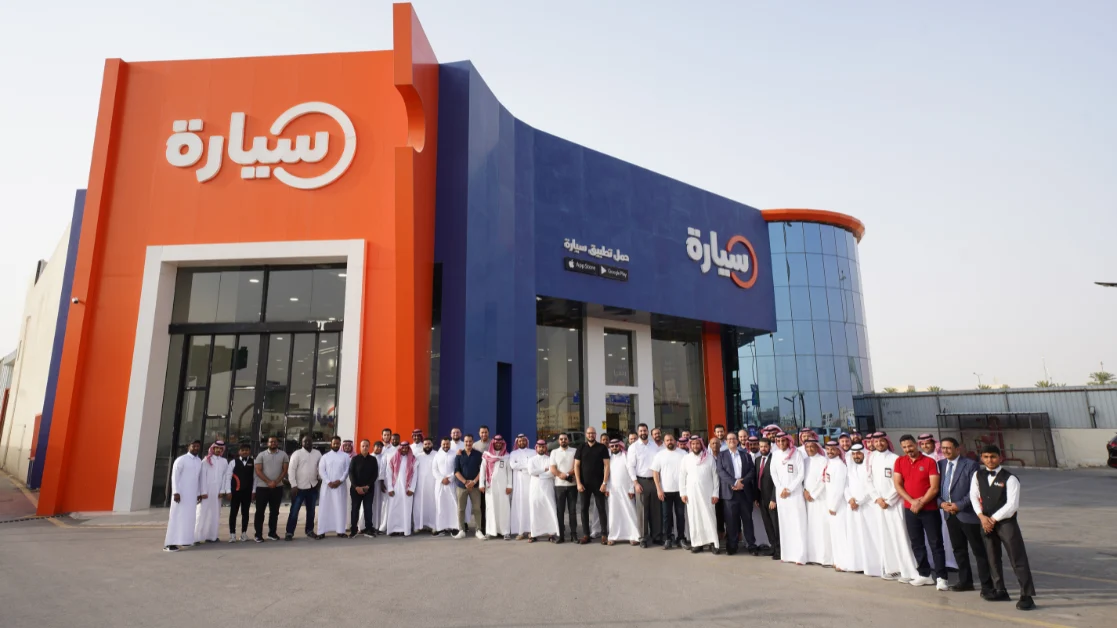

**Context**

Syarah.com adalah sebuah platform online yang berbasis di Arab Saudi, yang awalnya dikenal sebagai tempat untuk jual-beli barang bekas melalui sistem lelang. Namun, seiring perkembangannya, Syarah.com tidak hanya fokus pada lelang saja. Platform ini juga menawarkan sistem transaksi lain yang lebih fleksibel, terutama dalam kategori otomotif, seperti penjualan mobil, motor, dan suku cadang kendaraan.

Salah satu keunggulan Syarah.com adalah kemampuannya menarik perhatian para pecinta otomotif. Misalnya, bagi mereka yang ingin menjual mobil atau motor bekas, Syarah.com menyediakan opsi selain lelang, seperti penjualan langsung dengan harga tetap. Dengan cara ini, penjual dapat menentukan harga jual tanpa harus melewati proses penawaran seperti pada lelang. Sistem ini memberikan alternatif yang lebih praktis bagi penjual maupun pembeli yang mencari transaksi cepat dan efisien.

Platform ini juga memperhatikan faktor-faktor penting dalam transaksi otomotif, seperti kondisi kendaraan, kelengkapan dokumen, serta kejelasan harga pasar. Bagi penjual, memahami nilai pasar kendaraan sangatlah penting agar dapat menetapkan harga yang kompetitif. Sedangkan bagi pembeli, platform ini memberikan akses ke berbagai pilihan kendaraan dengan harga yang transparan dan sesuai dengan anggaran.

Dengan kombinasi sistem lelang dan penjualan langsung, Syarah.com berhasil menciptakan ekosistem jual-beli otomotif yang inovatif dan saling menguntungkan bagi semua pihak. Sebagai perusahaan yang bergerak di Arab Saudi, Syarah.com juga mendukung pertumbuhan industri otomotif lokal dengan memberikan akses kepada masyarakat untuk berpartisipasi dalam pasar digital yang modern dan terpercaya.

**Problem Statement**

Salah Sharef, CEO dan Co-Founder dari Syarah, platform e-commerce otomotif terkemuka di Arab Saudi, memiliki visi besar untuk memperluas bisnisnya secara signifikan. Salah satu strategi utamanya adalah membeli mobil-mobil bekas yang paling sering dibeli oleh pelanggan di Arab Saudi. Namun, dalam upaya mencapai tujuan ini, Salah menghadapi tantangan besar dalam menentukan harga pembelian mobil secara efisien dan akurat. Saat ini, proses estimasi harga mobil masih dilakukan secara manual oleh tim internal, yang tidak hanya memakan waktu dan biaya operasional tinggi, tetapi juga rentan terhadap kesalahan manusia bahkan terkadang tim internal estimasi  harga dengan rata-rata harga mobil per merek.

Untuk mengatasi masalah ini, Salah ingin mengembangkan model machine learning yang dapat memprediksi harga mobil dengan lebih cepat dan akurat berdasarkan data historis penjualan. Model ini diharapkan dapat membantu Syarah menentukan harga pembelian mobil secara lebih *cost-effective* dan *time-effective*, sehingga mempercepat proses ekspansi perusahaan. Selain itu, agar fokus ekspansi lebih terarah dan efisien, Salah memutuskan untuk membatasi pembelian mobil hanya pada 5 merek mobil paling populer di Arab Saudi pada tahun 2020, yaitu **Toyota, Hyundai, Nissan, Mazda, dan Kia**. 

Keputusan ini didasarkan pada analisis pasar yang menunjukkan bahwa kelima merek tersebut mendominasi pangsa pasar mobil di Arab Saudi, baik dari segi penjualan maupun preferensi konsumen. Dengan fokus pada merek-merek ini, Syarah dapat memaksimalkan efisiensi operasional dan memastikan bahwa investasi mereka sesuai dengan permintaan pasar yang tinggi. Selain itu, membatasi jumlah merek juga memungkinkan perusahaan untuk mengoptimalkan pengelolaan inventaris serta meningkatkan kepuasan pelanggan melalui penyediaan produk yang paling diminati.

**Referensi:**
1. Statista. (n.d.). *Best-selling car models in Saudi Arabia*. Diakses dari [https://www.statista.com/statistics/375657/best-selling-car-models-in-saudi-arabia/](https://www.statista.com/statistics/375657/best-selling-car-models-in-saudi-arabia/)  
2. China Mobil. (n.d.). *Car sales in Saudi Arabia by brand (2020)*. Diakses dari [https://www.chinamobil.ru/eng/sales/sales_saudi_arabia?year=20&mon=0](https://www.chinamobil.ru/eng/sales/sales_saudi_arabia?year=20&mon=0)

**Goals**

Berdasarkan permasalahan tersebut, Syarah tentu membutuhkan sebuah **'tool' berbasis machine learning** yang dapat memprediksi harga mobil bekas secara akurat dan efisien. Tool ini diharapkan dapat membantu tim internal Syarah untuk **menentukan harga pembelian mobil yang tepat**, khususnya untuk merek-merek mobil paling populer di Arab Saudi, seperti Toyota, Hyundai, Nissan, Mazda, dan Kia. Dengan mempertimbangkan berbagai faktor seperti usia mobil, kondisi kendaraan, tipe model, serta tren pasar, prediksi harga dapat menjadi lebih presisi. Hal ini tidak hanya akan mengurangi risiko kesalahan manusia dalam estimasi harga, tetapi juga dapat meningkatkan efisiensi operasional perusahaan.

Bagi Syarah, pengembangan prediction tool ini memiliki dampak strategis yang signifikan. Pertama, dengan menawarkan harga pembelian mobil yang kompetitif dan sesuai dengan nilai pasar, Syarah dapat membangun kepercayaan pelanggan serta memperluas basis penjual potensial. Kedua, fokus pada lima merek mobil terpopuler memastikan bahwa investasi Syarah selaras dengan permintaan pasar yang tinggi, sehingga inventaris mobil mereka lebih cepat terjual. Ketiga, peningkatan efisiensi dalam proses penentuan harga akan mempercepat ekspansi bisnis Syarah, yang pada akhirnya berkontribusi pada pertumbuhan revenue perusahaan melalui penjualan mobil bekas dengan margin keuntungan yang optimal.

Dengan kata lain, semakin banyak mobil yang dibeli dan dijual oleh Syarah, semakin besar pula peluang perusahaan untuk meningkatkan pendapatan dari biaya transaksi, layanan tambahan, dan ekspansi pasar. Prediction tool ini tidak hanya menjadi solusi teknologi bagi Syarah, tetapi juga menjadi langkah strategis untuk memperkuat posisi mereka sebagai pemimpin di industri e-commerce otomotif di Arab Saudi.

# Read Dataset

In [2]:
df =pd.read_csv("data_saudi_used_cars.csv")
df

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0
...,...,...,...,...,...,...,...,...,...,...,...
5619,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,False,68000
5620,Altima,Jeddah,Nissan,Automatic,Saudi,Semi Full,2020,2.5,58000,True,0
5621,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,False,145000
5622,RX,Dammam,Lexus,Automatic,Gulf Arabic,Full,2016,2.5,81000,False,154000


**Penjelasan untuk Dataset:**
Dataset ini berisi 5.624 catatan mobil bekas yang dikumpulkan dari syarah.com pada 2020. Setiap baris mewakili satu unit mobil bekas. Informasi tambahan terkait setiap mobil meliputi nama merek, model, tahun pembuatan, asal mobil, pilihan fitur, kapasitas mesin, jenis transmisi, jarak tempuh yang telah ditempuh mobil, wilayah penjualan, harga, dan apakah harganya dapat dinegosiasikan.

**Fitur-fitur dalam Dataset:**
- **Type**: Jenis mobil bekas.
- **Region**: Wilayah di mana mobil bekas tersebut ditawarkan untuk dijual.
- **Make**: Nama perusahaan atau merek mobil.
- **Gear_Type**: Jenis transmisi mobil bekas (misalnya manual atau otomatis).
- **Origin**: Asal mobil bekas (misalnya impor atau lokal).
- **Options**: Fitur atau pilihan tambahan yang dimiliki mobil bekas.
- **Year**: Tahun pembuatan mobil.
- **Engine_Size**: Kapasitas mesin mobil bekas.
- **Mileage**: Jarak tempuh mobil bekas (dalam mile).
- **Negotiable**: Bernilai benar jika harga adalah 0, yang berarti harganya dapat dinegosiasikan.
- **Price**: Harga mobil bekas.

# Data Cleaning

Sebelum melakukan analisis lebih lanjut, penting untuk **memfilter dataset** agar hanya mencakup data dari merek-merek mobil yang relevan.

In [3]:
# Daftar merek mobil yang diinginkan
selected_brands = ['Toyota', 'Hyundai', 'Nissan', 'Mazda', 'Kia']

# Filter dataset hanya untuk merek-merek yang dipilih
filtered_df = df[df['Make'].isin(selected_brands)]

## Check Missing Value

In [4]:
filtered_df.isnull().sum()

Type           0
Region         0
Make           0
Gear_Type      0
Origin         0
Options        0
Year           0
Engine_Size    0
Mileage        0
Negotiable     0
Price          0
dtype: int64

Didalam dataset tidak terdapat missing value

## Delete Kolom dan Data Tidak relevan

kolom Harga memiliki beberapa nilai 0, yang mana hal ini tidak mungkin terjadi. Untuk menangani anomali ini, hal yang akan dilakukan adalah menghapus baris pada kolom Harga yang memiliki nilai 0.

In [5]:
df_clean = filtered_df[filtered_df['Price']!=0]
df_clean

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
5,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,False,58000
7,Sonata,Riyadh,Hyundai,Automatic,Saudi,Full,2016,2.4,155,False,48000
8,Avalon,Riyadh,Toyota,Automatic,Saudi,Standard,2016,3.5,110864,False,81500
11,Land Cruiser,Riyadh,Toyota,Automatic,Saudi,Full,2011,4.6,79000,False,145000
...,...,...,...,...,...,...,...,...,...,...,...
5611,Sportage,Khobar,Kia,Automatic,Saudi,Standard,2019,1.6,43000,False,68000
5612,Azera,Riyadh,Hyundai,Automatic,Other,Semi Full,2011,3.5,447,False,21000
5615,6,Jeddah,Mazda,Automatic,Saudi,Semi Full,2017,2.5,106000,False,56000
5616,CX9,Qassim,Mazda,Automatic,Saudi,Full,2020,2.0,9500,False,132000


In [6]:
df_clean["Negotiable"].unique()

array([False])

Karena seluruh isi dari kolom Negotiable bernilai False , maka kolom ini tidak memberikan informasi yang bermanfaat atau variabilitas yang diperlukan untuk dijadikan fitur dalam model. Oleh karena itu, kolom Negotiable dapat dihapus karena tidak cocok digunakan sebagai feature dalam proses pemodelan.

In [7]:
# Menghapus kolom 'Negotiable'
df_clean.drop(columns=['Negotiable'], inplace=True)

C:\Users\zidan\AppData\Local\Temp\ipykernel_26228\2544367556.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop(columns=['Negotiable'], inplace=True)


Berdasarkan **riset pasar**, harga mobil paling rendah di pasar adalah **5000**. Oleh karena itu, data dengan harga di bawah **5000** kemungkinan **tidak valid** atau **tidak sesuai dengan realitas pasar**. Untuk memastikan kualitas dataset, baris-baris dengan harga di bawah **5000** perlu **dibuang/dihapus**.

Referensi:
- [YallaMotor - Used Cars Search](https://ksa.yallamotor.com/used-cars/search?page=5&sort=price_asc)

In [8]:
# Filter baris dengan Price di bawah 5000
below_5000 = df_clean[df_clean['Price'] < 5000]

# Hitung jumlah baris yang memenuhi kondisi
count_below_5000 = len(below_5000)

# Tampilkan hasil
print(f"Jumlah data dengan Price di bawah 5000: {count_below_5000}")

Jumlah data dengan Price di bawah 5000: 43


In [9]:
df_clean = df_clean[df_clean['Price']>=5000]

Berdasarkan riset pasar , jarak tempuh kendaraan (mileage) yang melebihi 700.000 dianggap tidak masuk akal dalam konteks penggunaan kendaraan normal 5. Oleh karena itu, data dengan nilai mileage lebih dari 700.000 kemungkinan tidak valid atau tidak sesuai dengan realitas penggunaan kendaraan . Untuk memastikan kualitas dataset, baris-baris dengan mileage di atas 700.000 perlu dibuang/dihapus .

In [10]:
df_clean = df_clean[df_clean['Mileage']<= 700000]

## Check Duplicate Value

In [11]:
df_clean.duplicated().sum()

3

Ditemukan bahwa dataset mengandung **nilai duplikat**. Sehingga perlu dilakukan **menghapus nilai-nilai duplikat** untuk memastikan bahwa setiap entri dalam dataset unik dan relevan.

In [12]:
# Menghapus semua baris duplikat
df_clean = df_clean.drop_duplicates()

# Data Analysis

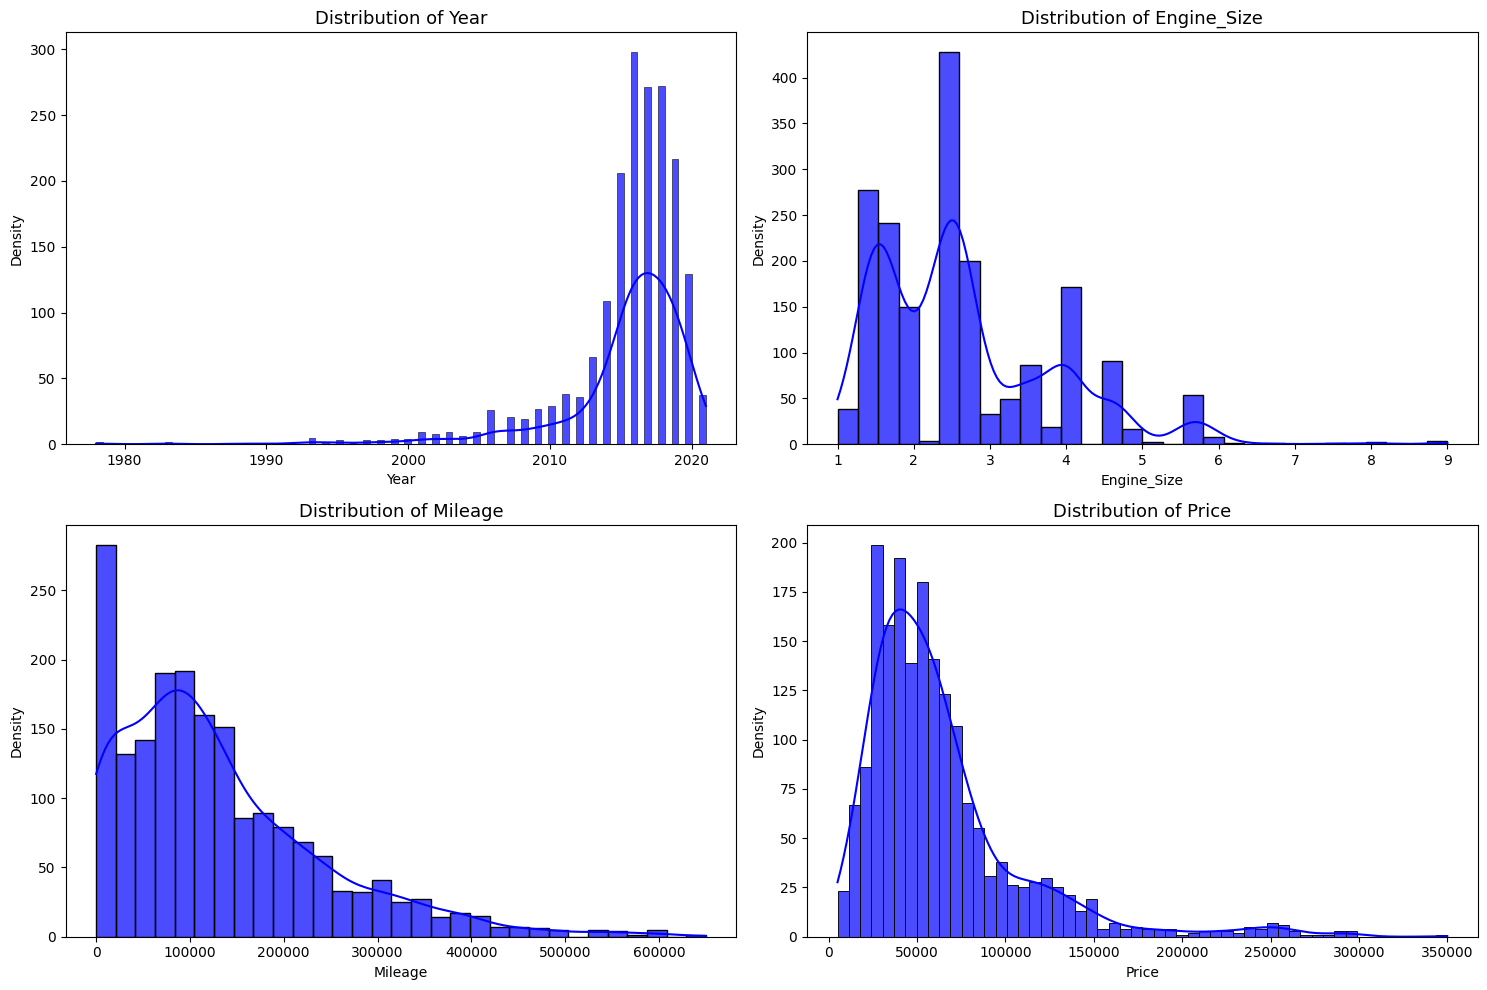

In [13]:
# Filter hanya kolom numerik
numerical_columns = df_clean.select_dtypes(include=['int64', 'float64']).columns

# Hitung jumlah baris dan kolom untuk subplot
n_rows = (len(numerical_columns) + 1) // 2  # Jumlah baris (dibagi menjadi 2 kolom)
n_cols = 2  # Jumlah kolom

# Buat subplot untuk setiap variabel numerik
plt.figure(figsize=(15, 5 * n_rows))  # Sesuaikan ukuran berdasarkan jumlah baris
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(
        df_clean[column], 
        kde=True, 
        color='blue',  # Warna utama histogram
        edgecolor='black',  # Warna garis tepi batang histogram
        alpha=0.7            # Transparansi histogram
    )
    plt.title(f'Distribution of {column}', fontsize=13)
    plt.xlabel(column)
    plt.ylabel('Density')

plt.tight_layout()  # Agar subplot tidak tumpang tindih
plt.show()

Berdasarkan histogram yang telah dibuat sebelumnya, dapat disimpulkan bahwa tidak ada data yang terdistribusi secara normal . Hal ini dapat dilihat dari bentuk histogram yang tidak menunjukkan pola distribusi normal, seperti kurva lonceng simetris yang diharapkan.

In [14]:
# Pilih hanya kolom numerik
numerical_columns = df_clean.select_dtypes(include=['int64', 'float64']).columns

# Hapus kolom 'Price' dari daftar kolom numerik
numerical_columns = numerical_columns.drop('Price', errors='ignore')

# Hitung matriks korelasi Spearman untuk kolom numerik (tanpa 'Price')
spearman_corr = df_clean[numerical_columns].corr(method='spearman')

# Tampilkan matriks korelasi
print(spearman_corr)

                 Year  Engine_Size   Mileage
Year         1.000000    -0.207530 -0.493065
Engine_Size -0.207530     1.000000  0.104362
Mileage     -0.493065     0.104362  1.000000


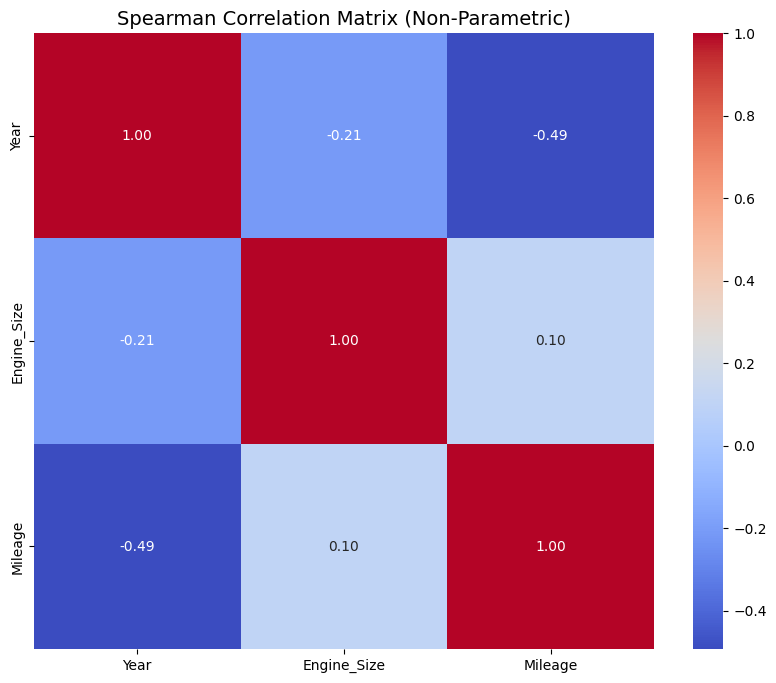

In [15]:
# Visualisasi matriks korelasi Spearman
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Spearman Correlation Matrix (Non-Parametric)', fontsize=14)
plt.show()

Insight:
1. Hubungan yang Paling Kuat:
- **Hubungan negatif sedang antara `Year` dan `Mileage` (-0.493065):**
  - Menunjukkan bahwa mobil yang lebih baru cenderung memiliki jarak tempuh yang lebih rendah.
  - Ini adalah pola yang logis dalam konteks data mobil, karena mobil lama biasanya sudah digunakan lebih lama dibandingkan mobil baru.

2. Hubungan yang Lemah:
- **Hubungan negatif lemah antara `Year` dan `Engine_Size` (-0.207530):**
  - Menunjukkan bahwa mobil modern cenderung menggunakan mesin yang lebih kecil (mungkin karena tren efisiensi bahan bakar atau ramah lingkungan).
  - Namun, hubungan ini tidak terlalu kuat, sehingga pengaruhnya mungkin tidak signifikan secara praktis.
  
- **Hubungan positif sangat lemah antara `Engine_Size` dan `Mileage` (0.104362):**
  - Menunjukkan bahwa ukuran mesin tidak memiliki pengaruh signifikan terhadap jarak tempuh.
  - Artinya, variabel ini hampir tidak saling memengaruhi dalam dataset ini.

3. Tidak Ada Multikolinearitas Serius:
- Semua nilai korelasi berada di bawah ambang batas **0.8**, sehingga tidak ada indikasi multikolinearitas serius antara variabel independen.
- Ini berarti variabel-variabel (`Year`, `Engine_Size`, dan `Mileage`) dapat digunakan bersama dalam model regresi tanpa menyebabkan masalah stabilitas koefisien.


In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Hitung VIF untuk setiap variabel independen
X = df_clean[['Year', 'Engine_Size', 'Mileage']]  # Ganti dengan nama kolom variabel independen
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

      Variable       VIF
0         Year  6.943631
1  Engine_Size  6.331755
2      Mileage  2.418586


Berdasarkan hasil VIF, tidak ada indikasi multikolinearitas serius dalam model Anda karena semua nilai VIF berada di bawah 10

# Feature Engineering

## Define Feature and Label

In [17]:
# Define features (X) and target (y)
X = df_clean.drop('Price', axis=1)  # Features
y = df_clean['Price']  # Target

## Split Data Train and Test

In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Encode and Scaling

In [19]:
# Mencari semua kolom kategorikal
categorical_columns = filtered_df.select_dtypes(include=['object']).columns

# Mencari semua nilai unik dari setiap kolom kategorikal
unique_values = {col: filtered_df[col].unique() for col in categorical_columns}

# Menampilkan nilai unik dari setiap kolom kategorikal
for col, values in unique_values.items():
    print(f'Kolom: {col}')
    print(f'Nilai unik: {values}\n')

Kolom: Type
Nilai unik: ['Corolla' 'Optima' 'FJ' 'CX3' 'Sonata' 'Avalon' 'Land Cruiser' 'Hilux'
 'Tucson' 'Sunny' 'Azera' 'Camry' 'Pathfinder' 'Accent' 'Yaris' 'Altima'
 'Senta fe' '3' 'Elantra' 'Land Cruiser Pickup' 'VTC' 'Patrol' 'Previa'
 'Datsun' '6' 'Innova' 'Navara' 'H1' 'Carnival' 'Avanza' 'Land Cruiser 70'
 'Cerato' 'Furniture' 'Murano' 'BT-50' 'Hiace' 'Rav4' 'Ciocca' 'CX9'
 'Kona' 'Sentra' 'Sylvian Bus' 'Opirus' 'Creta' 'Sedona' 'Sorento' 'Cores'
 'Prado' 'Cadenza' 'Rio' 'Maxima' 'X-Trail' 'Cressida' 'Rush' 'Genesis'
 'K5' 'CX5' 'Mohave' 'Veloster' 'Aurion' 'Carenz' 'Coupe S' 'Juke'
 'Sportage' 'X-Terra' 'Picanto' 'Armada' 'KICKS' 'Other' 'H100'
 'Bus Urvan' 'Corolla Cross' 'Echo' 'Dyna' 'Seltos' 'Prius' 'Soul' 'Pegas'
 'Coaster' 'Z370' 'Bus County' 'Stinger' 'Carens' 'Crown' 'Tuscani'
 '4Runner' 'Coupe' '2' 'i40' 'Avante' 'Z350' 'CX7' 'Centennial']

Kolom: Region
Nilai unik: ['Abha' 'Hafar Al-Batin' 'Riyadh' 'Yanbu' 'Aseer' 'Al-Baha' 'Jeddah'
 'Hail' 'Al-Ahsa' 'Jazan' 'Dammam


---

**Penjelasan Encoding untuk Setiap Kolom**

**1. Kolom: `Options`**
- **Nilai Unik**: `['Full', 'Semi Full', 'Standard']`
- **Jenis Data**: Ordinal (memiliki urutan: **Full > Semi Full > Standard**)
- **Encoding**: **Ordinal Encoding**
  - Menggunakan `OrdinalEncoder` untuk mempertahankan urutan kategori.
  - **Representasi numerik**:
    - `Full = 2`
    - `Semi Full = 1`
    - `Standard = 0`

---

**2. Kolom: `Origin`**
- **Nilai Unik**: `['Saudi', 'Gulf Arabic', 'Other', 'Unknown']`
- **Jenis Data**: Nominal (tidak memiliki urutan)
- **Encoding**: **One-Hot Encoding**
  - Menggunakan `OneHotEncoder` karena jumlah nilai unik sedikit dan tidak ada implikasi urutan.
  - **Contoh output**:
    - `Saudi -> [1, 0, 0, 0]`
    - `Gulf Arabic -> [0, 1, 0, 0]`

---

**3. Kolom: `Gear_Type`**
- **Nilai Unik**: `['Manual', 'Automatic']`
- **Jenis Data**: Nominal (tidak memiliki urutan)
- **Encoding**: **One-Hot Encoding**
  - Menggunakan `OneHotEncoder` untuk memastikan representasi data tetap akurat tanpa implikasi urutan.

---

**4. Kolom: `Make`**
- **Nilai Unik**: `['Toyota', 'Kia', 'Mazda', 'Hyundai', 'Nissan']`
- **Jenis Data**: Nominal (tidak memiliki urutan)
- **Encoding**: **One-Hot Encoding**
  - Menggunakan `OneHotEncoder` karena jumlah nilai unik sedikit dan tidak ada implikasi urutan.

---
**5. Kolom: `Region`**
- **Nilai Unik**: `['Abha', 'Hafar Al-Batin', 'Riyadh', ..., 'Wadi Dawasir']`
- **Jenis Data**: Nominal (tidak memiliki urutan)
- **Encoding**: **Binary Encoding**
  - Menggunakan `BinaryEncoder` karena jumlah nilai unik sedang (~20-30).
  - Binary Encoding mengurangi dimensi dibandingkan One-Hot Encoding tanpa menambahkan implikasi urutan.

---
**6. Kolom: `Type`**
- **Nilai Unik**: `['Corolla', 'Optima', 'FJ', ..., 'Centennial']`
- **Jenis Data**: Nominal (tidak memiliki urutan)
- **Encoding**: **Binary Encoding**
  - Menggunakan `BinaryEncoder` karena jumlah nilai unik tinggi (>50).
  - Binary Encoding membantu mengurangi dimensi dataset tanpa menyebabkan pembengkakan fitur seperti pada One-Hot Encoding.

In [20]:
# Identifikasi kolom numerik dan kategorikal
categorical_cols_onehot = ['Origin', 'Gear_Type', 'Make']  # Kolom untuk one-hot encoding
categorical_cols_ordinal = ['Options']  # Kolom untuk ordinal encoding
categorical_cols_binary = ['Region', 'Type']  # Kolom untuk binary encoding
numerical_cols = ['Year', 'Engine_Size', 'Mileage'] # Identifikasi kolom numerik

# Define ordinal categories for 'Options'
options_order = ['Full', 'Semi Full', 'Standard']

# Buat ColumnTransformer untuk preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_cols),
        ('cat_onehot', OneHotEncoder(handle_unknown='ignore'), categorical_cols_onehot),  # One-hot encode nominal features
        ('cat_ordinal', OrdinalEncoder(categories=[options_order]), categorical_cols_ordinal),  # Ordinal encode ordinal features
        ('cat_binary', BinaryEncoder(), categorical_cols_binary)  # Binary encode high-cardinality features
    ])

# Model Default

In [21]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import (
    explained_variance_score, mean_absolute_error, mean_squared_error
    , r2_score, mean_absolute_percentage_error
)
import seaborn as sns
import matplotlib.pyplot as plt

# Fungsi untuk menghitung metrik evaluasi
def regression_results(y_true, y_pred):
    explained_variance = explained_variance_score(y_true, y_pred)
    mean_absolute_error_val = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    residual_mean = (y_true - y_pred).mean()
    mape = mean_absolute_percentage_error(y_true, y_pred) * 100
    rmse = np.sqrt(mse)
    rmspe = np.sqrt(np.mean(((y_true - y_pred) / y_true) ** 2)) * 100
    
    # Return results as a dictionary
    return {
        'Explained Variance': round(explained_variance, 4),
        'R2 Score': round(r2, 4),
        'MAE': round(mean_absolute_error_val, 4),
        'MAPE (%)': round(mape, 4),
        'MSE': round(mse, 4),
        'RMSE': round(rmse, 4),
        'RMSPE (%)': round(rmspe, 4),
        'Residual Mean': round(residual_mean, 4)
    }

Hasil Model Testing GradientBoostingRegressor

Hasil data Testing GradientBoostingRegressor
Explained Variance: 0.8934
R2 Score: 0.8934
MAE: 9973.8939
MAPE (%): 19.1399
MSE: 229394330.0123
RMSE: 15145.7694
RMSPE (%): 30.0576
Residual Mean: -100.809
Model: GradientBoostingRegressor
Dataset: Test


C:\Users\zidan\AppData\Local\Temp\ipykernel_26228\2282633778.py:48: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame([test_metrics])], ignore_index=True)


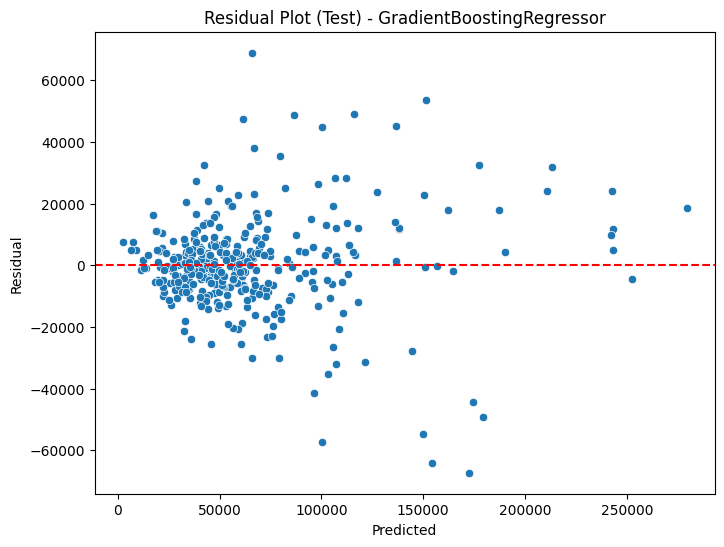

Hasil Model Training GradientBoostingRegressor

Hasil data Training GradientBoostingRegressor
Explained Variance: 0.9325
R2 Score: 0.9325
MAE: 7888.7708
MAPE (%): 14.4871
MSE: 139789983.9743
RMSE: 11823.2814
RMSPE (%): 21.3309
Residual Mean: 0.0
Model: GradientBoostingRegressor
Dataset: Train


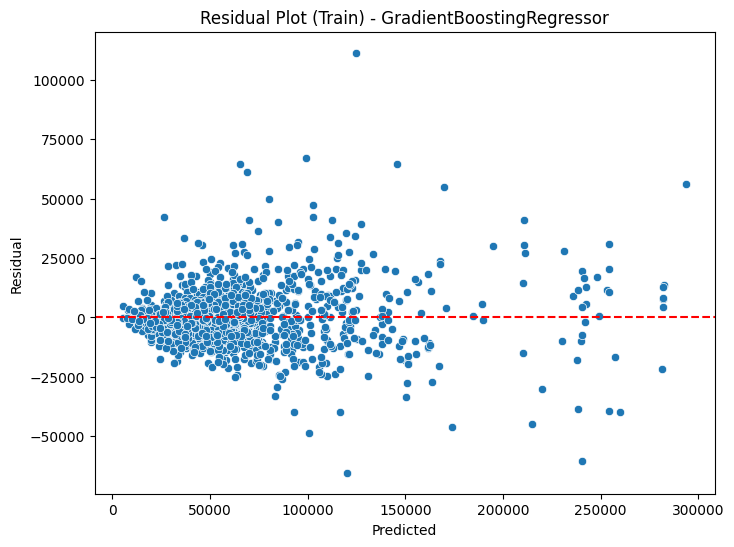


--------------------------------------------------

Hasil Model Testing KNeighborsRegressor

Hasil data Testing KNeighborsRegressor
Explained Variance: 0.7359
R2 Score: 0.7246
MAE: 16618.1493
MAPE (%): 38.8652
MSE: 592737884.5547
RMSE: 24346.2088
RMSPE (%): 74.5135
Residual Mean: -4939.9307
Model: KNeighborsRegressor
Dataset: Test


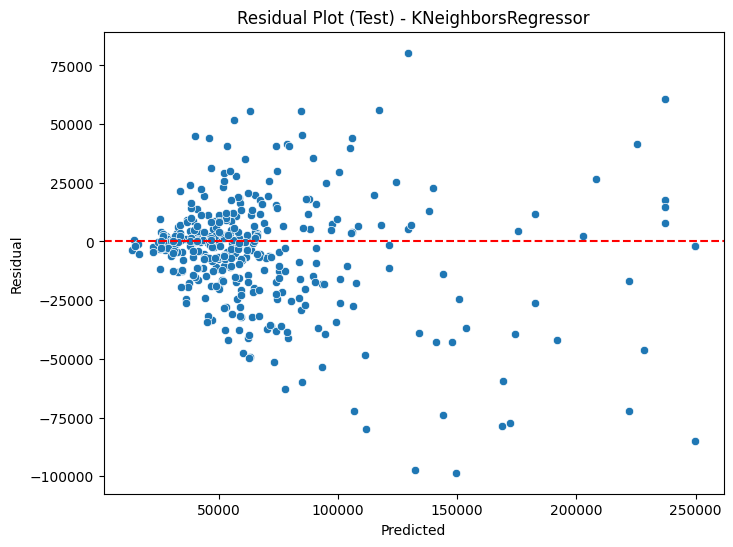

Hasil Model Training KNeighborsRegressor

Hasil data Training KNeighborsRegressor
Explained Variance: 0.7752
R2 Score: 0.7698
MAE: 13798.324
MAPE (%): 30.4956
MSE: 476685925.0693
RMSE: 21833.1382
RMSPE (%): 60.7773
Residual Mean: -3341.8547
Model: KNeighborsRegressor
Dataset: Train


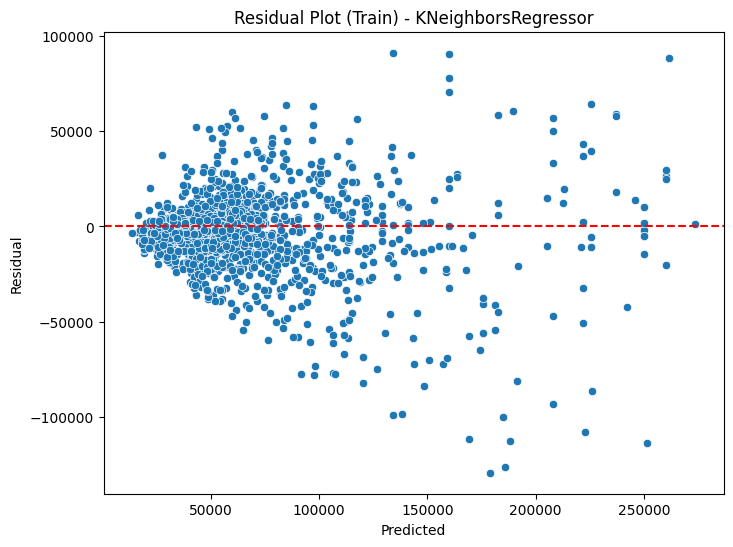


--------------------------------------------------

Hasil Model Testing DecisionTreeRegressor

Hasil data Testing DecisionTreeRegressor
Explained Variance: 0.8555
R2 Score: 0.8549
MAE: 10888.5333
MAPE (%): 19.9009
MSE: 312334560.0
RMSE: 17672.9896
RMSPE (%): 33.1561
Residual Mean: -1157.8667
Model: DecisionTreeRegressor
Dataset: Test


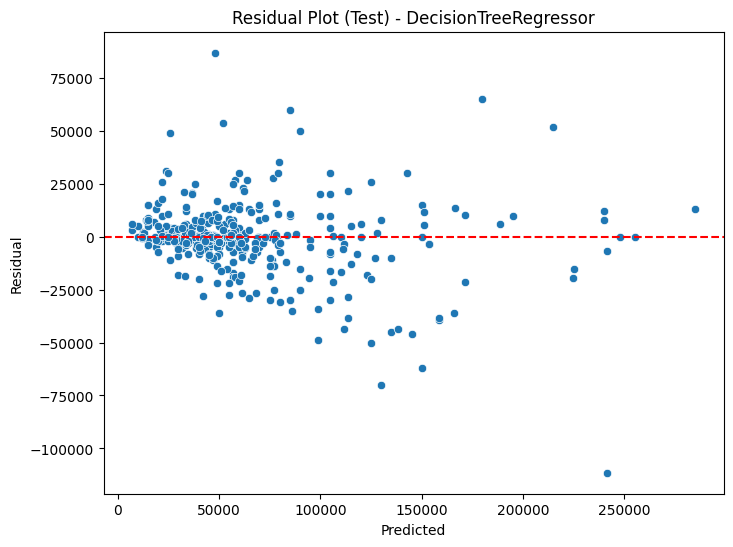

Hasil Model Training DecisionTreeRegressor

Hasil data Training DecisionTreeRegressor
Explained Variance: 1.0
R2 Score: 1.0
MAE: 2.6667
MAPE (%): 0.0021
MSE: 1500.0
RMSE: 38.7298
RMSPE (%): 0.0301
Residual Mean: 0.0
Model: DecisionTreeRegressor
Dataset: Train


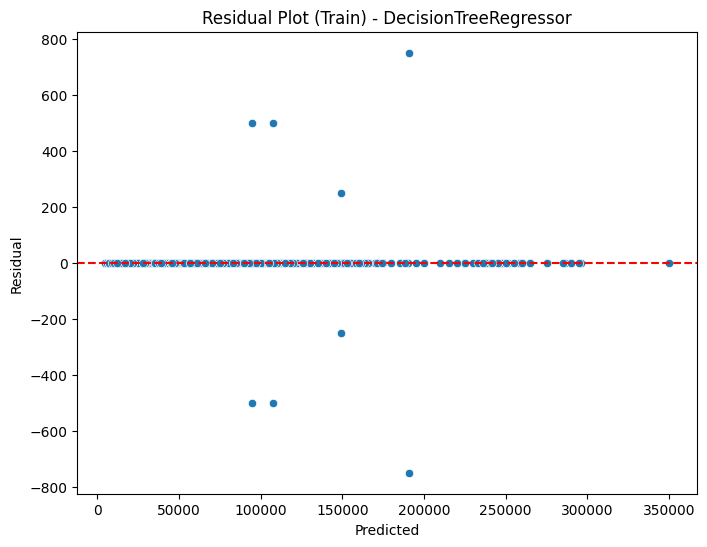


--------------------------------------------------

Hasil Model Testing XGBRegressor

Hasil data Testing XGBRegressor
Explained Variance: 0.9282
R2 Score: 0.9282
MAE: 8231.2887
MAPE (%): 15.3768
MSE: 154485280.0852
RMSE: 12429.2108
RMSPE (%): 24.7286
Residual Mean: 246.68
Model: XGBRegressor
Dataset: Test


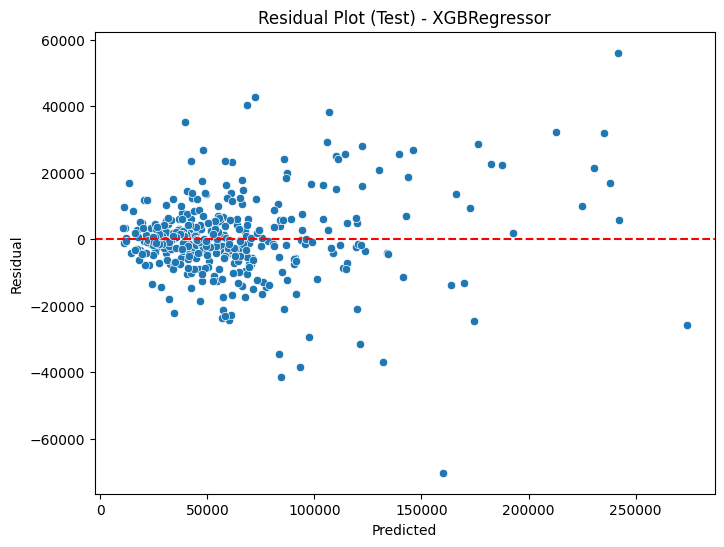

Hasil Model Training XGBRegressor

Hasil data Training XGBRegressor
Explained Variance: 0.9978
R2 Score: 0.9978
MAE: 1357.1076
MAPE (%): 2.6303
MSE: 4487343.5494
RMSE: 2118.3351
RMSPE (%): 3.9072
Residual Mean: 0.8255
Model: XGBRegressor
Dataset: Train


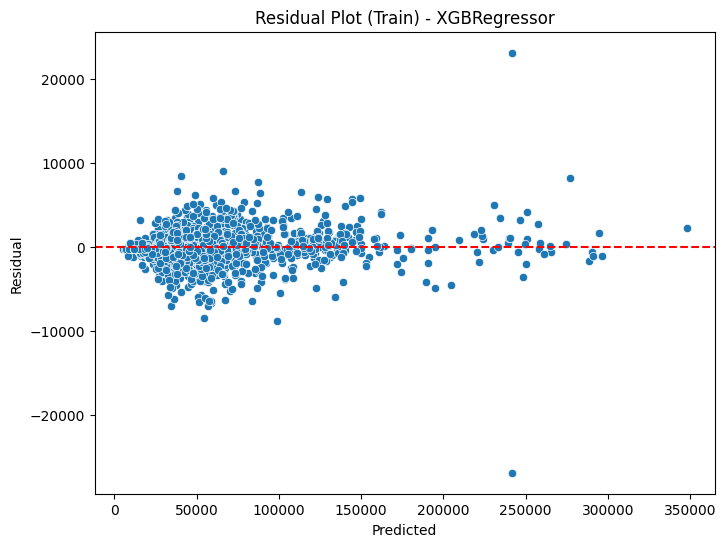


--------------------------------------------------

Hasil Model Testing RandomForestRegressor

Hasil data Testing RandomForestRegressor
Explained Variance: 0.9121
R2 Score: 0.9117
MAE: 8842.1928
MAPE (%): 16.3744
MSE: 189946942.2512
RMSE: 13782.124
RMSPE (%): 26.9872
Residual Mean: -830.6495
Model: RandomForestRegressor
Dataset: Test


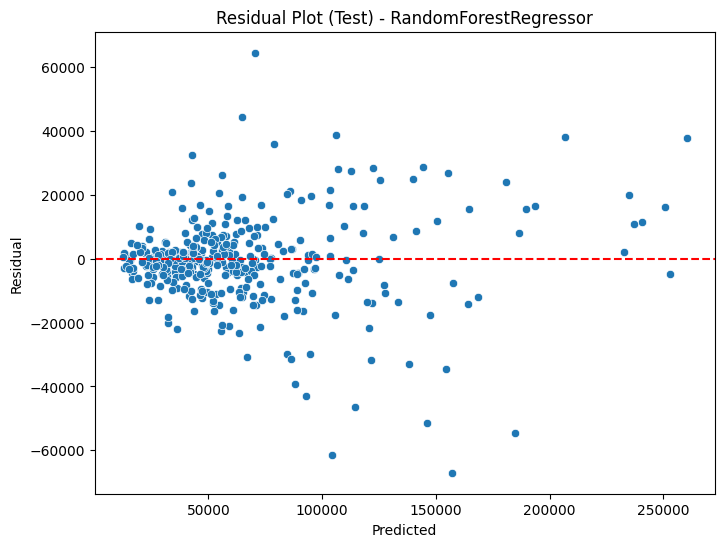

Hasil Model Training RandomForestRegressor

Hasil data Training RandomForestRegressor
Explained Variance: 0.9832
R2 Score: 0.9832
MAE: 3401.733
MAPE (%): 6.3782
MSE: 34803691.8561
RMSE: 5899.4654
RMSPE (%): 11.2602
Residual Mean: -295.1626
Model: RandomForestRegressor
Dataset: Train


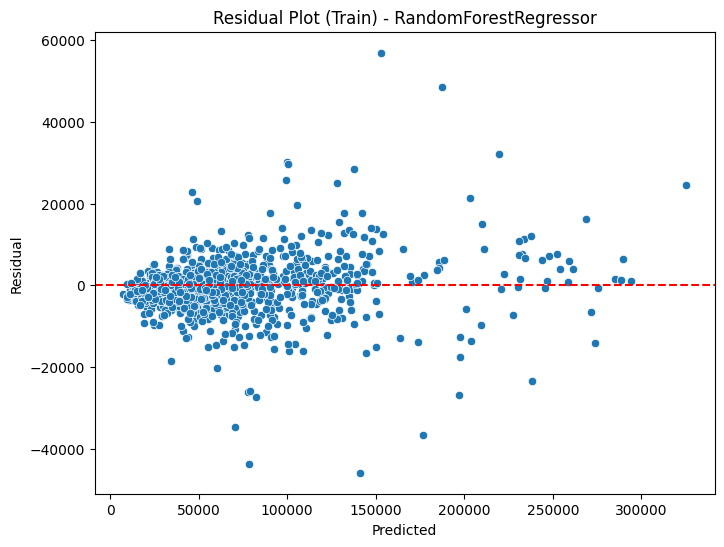


--------------------------------------------------

Hasil Model Testing SVR

Hasil data Testing SVR
Explained Variance: 0.0012
R2 Score: -0.0635
MAE: 30270.72
MAPE (%): 57.784
MSE: 2288784914.662
RMSE: 47841.247
RMSPE (%): 89.4238
Residual Mean: 11807.5793
Model: SVR
Dataset: Test


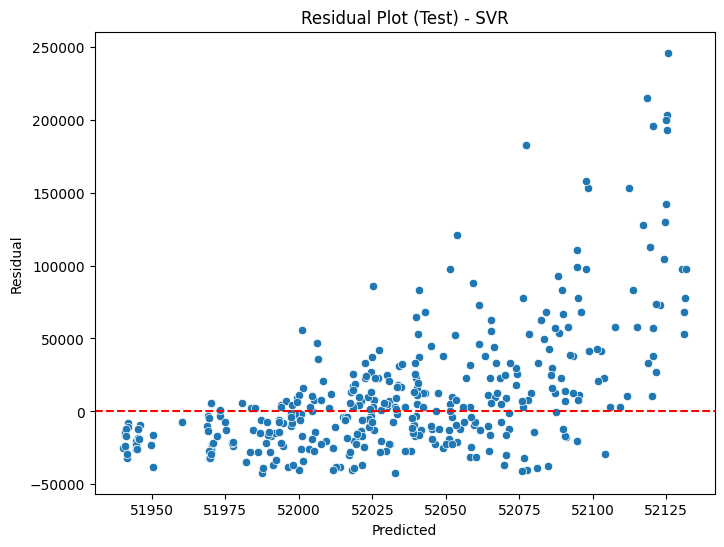

Hasil Model Training SVR

Hasil data Training SVR
Explained Variance: 0.0012
R2 Score: -0.062
MAE: 29471.7295
MAPE (%): 57.1939
MSE: 2199477109.3647
RMSE: 46898.5832
RMSPE (%): 94.9025
Residual Mean: 11433.9458
Model: SVR
Dataset: Train


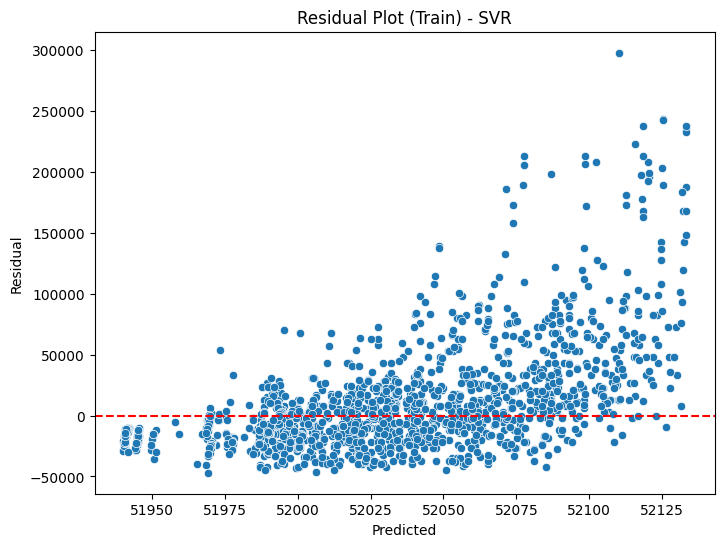


--------------------------------------------------

Hasil Model Testing LinearRegression

Hasil data Testing LinearRegression
Explained Variance: 0.7383
R2 Score: 0.7382
MAE: 15752.112
MAPE (%): 32.011
MSE: 563361574.4107
RMSE: 23735.2391
RMSPE (%): 53.8482
Residual Mean: -333.8933
Model: LinearRegression
Dataset: Test


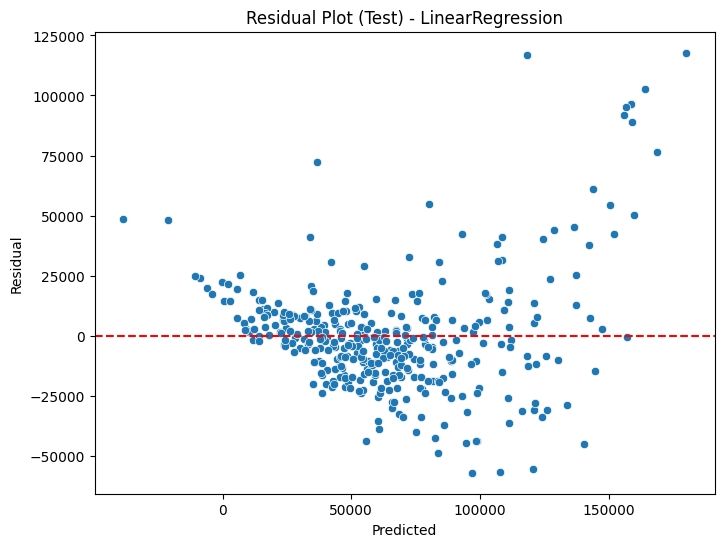

Hasil Model Training LinearRegression

Hasil data Training LinearRegression
Explained Variance: 0.6797
R2 Score: 0.6797
MAE: 16325.1333
MAPE (%): 36.1107
MSE: 663379672.144
RMSE: 25756.1579
RMSPE (%): 73.6207
Residual Mean: 3.9307
Model: LinearRegression
Dataset: Train


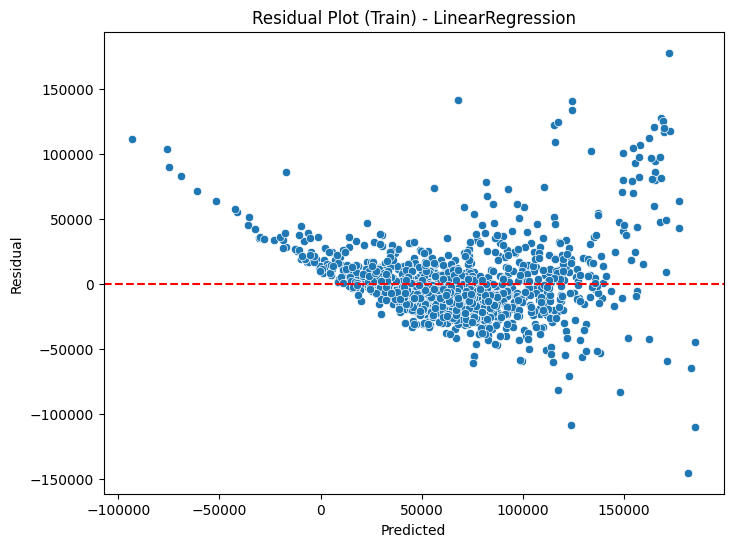


--------------------------------------------------

Hasil Model Testing Ridge

Hasil data Testing Ridge
Explained Variance: 0.7344
R2 Score: 0.7343
MAE: 15811.6405
MAPE (%): 31.9183
MSE: 571757891.2576
RMSE: 23911.4594
RMSPE (%): 52.8803
Residual Mean: -354.2414
Model: Ridge
Dataset: Test


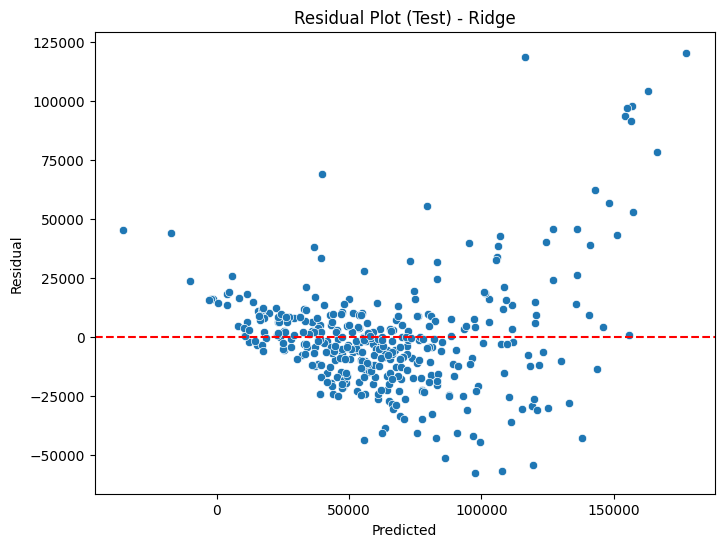

Hasil Model Training Ridge

Hasil data Training Ridge
Explained Variance: 0.6786
R2 Score: 0.6786
MAE: 16382.6736
MAPE (%): 35.5355
MSE: 665722828.9839
RMSE: 25801.6052
RMSPE (%): 69.9784
Residual Mean: 0.0
Model: Ridge
Dataset: Train


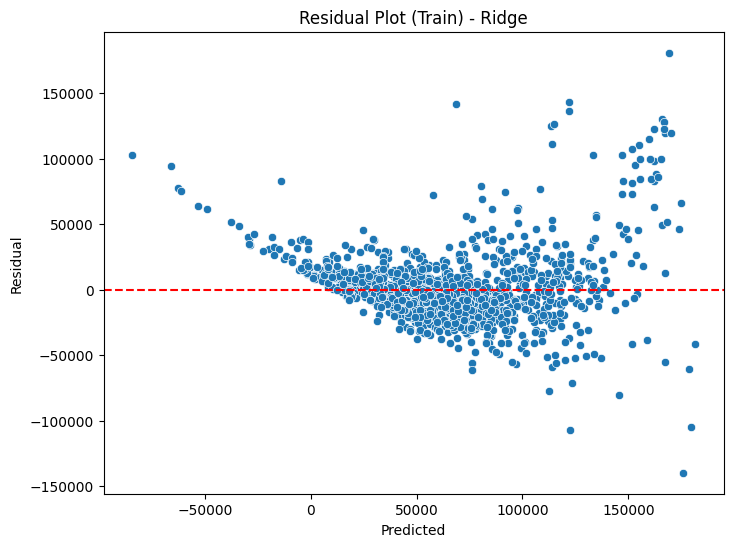


--------------------------------------------------

Hasil Model Testing Lasso

Hasil data Testing Lasso
Explained Variance: 0.7382
R2 Score: 0.7382
MAE: 15751.344
MAPE (%): 32.0039
MSE: 563438111.3696
RMSE: 23736.8513
RMSPE (%): 53.8419
Residual Mean: -337.5278
Model: Lasso
Dataset: Test


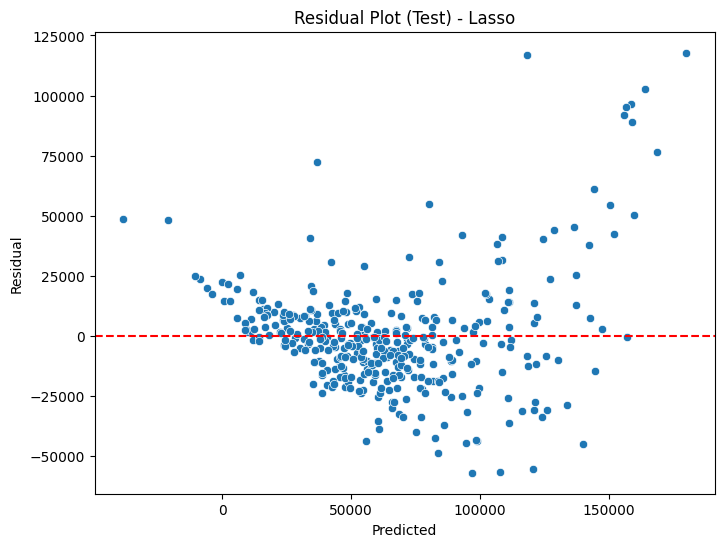

Hasil Model Training Lasso

Hasil data Training Lasso
Explained Variance: 0.6797
R2 Score: 0.6797
MAE: 16325.2578
MAPE (%): 36.1034
MSE: 663384518.9412
RMSE: 25756.252
RMSPE (%): 73.5761
Residual Mean: 0.0
Model: Lasso
Dataset: Train


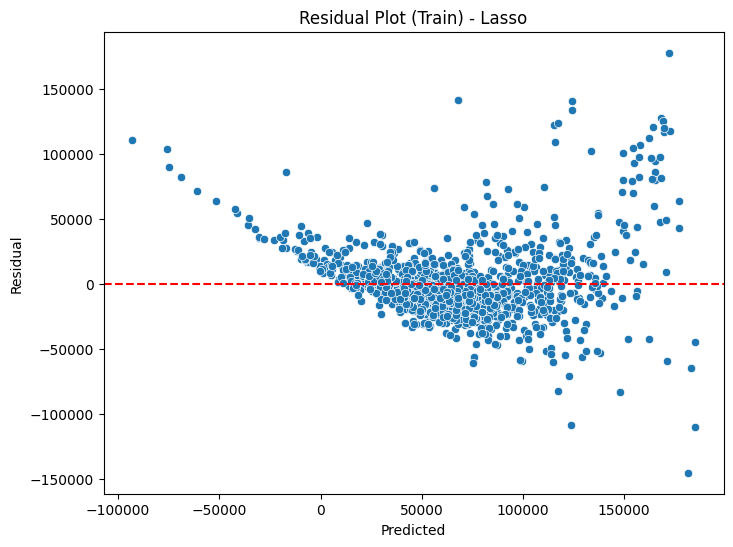


--------------------------------------------------



In [22]:
# List of models
list_model = [
    GradientBoostingRegressor(),
    KNeighborsRegressor(),
    DecisionTreeRegressor(),
    XGBRegressor(),
    RandomForestRegressor(),
    SVR(),
    LinearRegression(),
    Ridge(),
    Lasso()
]

# DataFrame untuk menyimpan hasil evaluasi
results_df = pd.DataFrame(columns=[
    'Model', 'Dataset', 'Explained Variance', 'R2 Score',
    'MAE', 'MAPE (%)', 'MSE', 'RMSE', 'RMSPE (%)', 'Residual Mean'
])

# Loop through each model
for model in list_model:
    # Create a pipeline with preprocessing and the current model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    # Fit the model on the training data
    pipeline.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred_test = pipeline.predict(X_test)
    
    # Predict on the train data
    y_pred_train = pipeline.predict(X_train)
    
    # Calculate metrics for test data
    test_metrics = regression_results(y_test, y_pred_test)
    test_metrics['Model'] = model.__class__.__name__
    test_metrics['Dataset'] = 'Test'
    
    # Calculate metrics for train data
    train_metrics = regression_results(y_train, y_pred_train)
    train_metrics['Model'] = model.__class__.__name__
    train_metrics['Dataset'] = 'Train'
    
    # Append results to DataFrame
    results_df = pd.concat([results_df, pd.DataFrame([test_metrics])], ignore_index=True)
    results_df = pd.concat([results_df, pd.DataFrame([train_metrics])], ignore_index=True)
    
    # Print results for test data
    print(f'Hasil Model Testing {model.__class__.__name__}\n')
    print(f"Hasil data Testing {model.__class__.__name__}")
    for key, value in test_metrics.items():
        print(f"{key}: {value}")
    
    # Plot residual for test data
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_pred_test, y=y_test - y_pred_test)
    plt.axhline(y=0, linestyle='--', color='red')
    plt.title(f'Residual Plot (Test) - {model.__class__.__name__}')
    plt.ylabel('Residual')
    plt.xlabel('Predicted')
    plt.show()
    
    # Print results for train data
    print(f'Hasil Model Training {model.__class__.__name__}\n')
    print(f"Hasil data Training {model.__class__.__name__}")
    for key, value in train_metrics.items():
        print(f"{key}: {value}")
    
    # Plot residual for train data
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_pred_train, y=y_train - y_pred_train)
    plt.axhline(y=0, linestyle='--', color='red')
    plt.title(f'Residual Plot (Train) - {model.__class__.__name__}')
    plt.ylabel('Residual')
    plt.xlabel('Predicted')
    plt.show()
    
    print("\n" + "-"*50 + "\n")



In [23]:
# Display the final results DataFrame
print("Summary of Model Performance:")
display(results_df)

Summary of Model Performance:


,Model,Dataset,Explained Variance,R2 Score,MAE,MAPE (%),MSE,RMSE,RMSPE (%),Residual Mean
0,GradientBoostingRegressor,Test,0.8934,0.8934,9973.8939,19.1399,2.293943e+08,15145.7694,30.0576,-100.8090
1,GradientBoostingRegressor,Train,0.9325,0.9325,7888.7708,14.4871,1.397900e+08,11823.2814,21.3309,0.0000
2,KNeighborsRegressor,Test,0.7359,0.7246,16618.1493,38.8652,5.927379e+08,24346.2088,74.5135,-4939.9307
3,KNeighborsRegressor,Train,0.7752,0.7698,13798.3240,30.4956,4.766859e+08,21833.1382,60.7773,-3341.8547
4,DecisionTreeRegressor,Test,0.8555,0.8549,10888.5333,19.9009,3.123346e+08,17672.9896,33.1561,-1157.8667
5,DecisionTreeRegressor,Train,1.0000,1.0000,2.6667,0.0021,1.500000e+03,38.7298,0.0301,0.0000
6,XGBRegressor,Test,0.9282,0.9282,8231.2887,15.3768,1.544853e+08,12429.2108,24.7286,246.6800
7,XGBRegressor,Train,0.9978,0.9978,1357.1076,2.6303,4.487344e+06,2118.3351,3.9072,0.8255
8,RandomForestRegressor,Test,0.9121,0.9117,8842.1928,16.3744,1.899469e+08,13782.1240,26.9872,-830.6495
9,RandomForestRegressor,Train,0.9832,0.9832,3401.7330,6.3782,3.480369e+07,5899.4654,11.2602,-295.1626


**Model yang dipilih adalah XGBRegressor**

**Penjelasan Pemilihan Model untuk Hyperparameter Tuning**

**1. Nilai MAPE Terendah**
- **XGBRegressor** memiliki nilai **MAPE (%) = 15.38** pada dataset testing, yang merupakan nilai **terendah** di antara semua model.
- **MAPE (%)** mengukur rata-rata persentase kesalahan absolut antara nilai prediksi dan nilai aktual. 
  - Semakin rendah nilai MAPE, semakin baik performa model dalam hal akurasi prediksi relatif terhadap target.

**2. Performa Keseluruhan Baik**
Selain MAPE, **XGBRegressor** juga menunjukkan performa yang sangat baik pada metrik evaluasi lainnya:
- **R2 Score**: **0.9282** (tinggi, mendekati 1, menunjukkan model mampu menjelaskan sebagian besar variasi data).
- **RMSE**: **12429.21** (lebih rendah dibandingkan beberapa model lainnya, menunjukkan kesalahan prediksi lebih kecil).

Model ini dipilih sebagai **kandidat utama** untuk proses **hyperparameter tuning** guna meningkatkan performa lebih lanjut.

# Evaluatian Metric

Dalam evaluasi model, saya memilih untuk menggunakan **MAPE (Mean Absolute Percentage Error)** dan **MAE (Mean Absolute Error)** sebagai metrik utama karena karakteristik data error (residual) yang mengandung **banyak outlier**. Berikut adalah alasain pendukung selain hal tersebut:

1. **Interpretasi praktis** yang lebih mudah dipahami.
2. **Fokus pada kesalahan relatif** terhadap nilai aktual.
3. **Toleransi terhadap skala variabel** yang berbeda-beda.
4. **Relevansi bisnis** yang lebih tinggi dalam konteks aplikasi nyata.

Metrik ini memberikan gambaran yang lebih adil dan representatif tentang performa model, terutama karena dataset memiliki karakteristik seperti outlier atau rentang nilai yang luas.

# Penjelasan cara kerja Model

**XGBoost** adalah algoritma machine learning yang bekerja dengan menggunakan banyak **pohon keputusan (decision trees)** untuk membuat prediksi. Dasar dari XGBoost adalah **decision tree**, yaitu model yang membagi data berdasarkan fitur-fiturnya untuk menghasilkan prediksi. Namun, XGBoost tidak hanya menggunakan satu pohon saja, melainkan **banyak pohon yang bekerja secara berurutan**.

- **Proses Sequential**:  
  Pohon pertama memberikan prediksi awal, tetapi biasanya prediksi ini belum sempurna karena ada kesalahan. Pohon kedua kemudian dibuat dengan tujuan **memperbaiki kesalahan dari pohon pertama**. Proses ini terus berlanjut: setiap pohon baru fokus memperbaiki kesalahan dari pohon sebelumnya. Hasil akhirnya adalah **gabungan dari semua pohon** yang saling melengkapi untuk menghasilkan prediksi yang lebih baik.

- **Mencegah Overfitting**:  
  XGBoost dirancang untuk mencegah overfitting dengan menambahkan aturan seperti:
  - **Membatasi kompleksitas pohon**: Misalnya, membatasi kedalaman pohon agar tidak terlalu rumit.
  - **Memberikan penalti**: Menambahkan penalti jika model terlalu kompleks atau terlalu spesifik terhadap data latih.

- **Efisiensi dan Fleksibilitas**:  
  Algoritma ini sangat efisien karena dapat **memproses data secara paralel**, sehingga cocok untuk dataset besar. Selain itu, XGBoost juga mampu **menangani data yang hilang (missing values)** tanpa memerlukan preprocessing tambahan.

- **Hasil Akhir yang Akurat**:  
  Dengan cara kerja seperti ini, XGBoost mampu menghasilkan prediksi yang sangat akurat, bahkan untuk dataset yang besar dan kompleks. Gabungan dari banyak pohon yang saling melengkapi membuat XGBoost menjadi salah satu algoritma yang paling populer dalam kompetisi machine learning.

# Hyperparameter Tuning

Berikut adalah penjelasan rinci mengenai parameter grid yang Anda gunakan untuk tuning hyperparameter pada model XGBoost:

---

**1. `regressor__n_estimators`**
```python
'regressor__n_estimators': [300, 400]
```
- **Penjelasan:** Parameter ini menentukan jumlah pohon (trees) dalam model ensemble [[2]]. Semakin banyak pohon, semakin kompleks modelnya, tetapi juga semakin besar risiko overfitting.
- **Penyesuaian:** Dalam kasus ini, jumlah pohon dikurangi menjadi `[300, 400]` untuk mengurangi kompleksitas model dan mencegah overfitting.

---

**2. `regressor__learning_rate`**
```python
'regressor__learning_rate': [0.02, 0.03]
```
- **Penjelasan:** Learning rate mengontrol seberapa besar langkah (step size) yang diambil selama proses boosting. Nilai yang lebih kecil membuat model belajar lebih lambat, tetapi cenderung lebih stabil [[6]].
- **Penyesuaian:** Nilai `0.02` dan `0.03` dipilih untuk memastikan model tidak terlalu cepat "belajar" pola noise dari data training.

---

**3. `regressor__max_depth`**
```python
'regressor__max_depth': [5, 6]
```
- **Penjelasan:** Parameter ini menentukan kedalaman maksimum setiap pohon. Kedalaman yang lebih tinggi membuat model lebih kompleks dan rentan terhadap overfitting [[6]].
- **Penyesuaian:** Nilai `[5, 6]` dipilih untuk menjaga keseimbangan antara kompleksitas dan generalisasi model.

---

**4. `regressor__subsample`**
```python
'regressor__subsample': [0.6, 0.7]
```
- **Penjelasan:** Subsample mengontrol proporsi data yang digunakan untuk melatih setiap pohon. Mengurangi nilai subsample dapat membantu mengurangi overfitting dengan memperkenalkan variasi dalam subset data [[9]].
- **Penyesuaian:** Nilai `[0.6, 0.7]` dipilih untuk membatasi penggunaan data secara berlebihan pada setiap iterasi.

---

**5. `regressor__colsample_bytree`**
```python
'regressor__colsample_bytree': [0.6, 0.7]
```
- **Penjelasan:** Parameter ini mengontrol proporsi fitur yang digunakan untuk melatih setiap pohon. Mengurangi nilai colsample_bytree dapat membantu mengurangi overfitting dengan membatasi jumlah fitur yang digunakan [[9]].
- **Penyesuaian:** Nilai `[0.6, 0.7]` dipilih untuk memastikan model tidak terlalu bergantung pada subset fitur tertentu.

---

**6. `regressor__reg_alpha`**
```python
'regressor__reg_alpha': [1.0, 2.0]
```
- **Penjelasan:** Reg_alpha adalah parameter regularisasi L1 yang menambahkan penalty pada bobot model. Nilai yang lebih tinggi meningkatkan regularisasi, sehingga mengurangi kompleksitas model [[9]].
- **Penyesuaian:** Nilai `[1.0, 2.0]` dipilih untuk memberikan regularisasi yang lebih kuat.

---

**7. `regressor__reg_lambda`**
```python
'regressor__reg_lambda': [1.0, 2.0]
```
- **Penjelasan:** Reg_lambda adalah parameter regularisasi L2 yang juga menambahkan penalty pada bobot model. Seperti reg_alpha, nilai yang lebih tinggi meningkatkan regularisasi [[9]].
- **Penyesuaian:** Nilai `[1.0, 2.0]` dipilih untuk memperkuat regularisasi.

---

**8. `regressor__min_child_weight`**
```python
'regressor__min_child_weight': [15, 20]
```
- **Penjelasan:** Parameter ini mengontrol jumlah minimum sampel yang diperlukan untuk membuat node baru dalam pohon. Nilai yang lebih tinggi membatasi pembelajaran pada subset data yang kecil, sehingga mengurangi overfitting [[7]].
- **Penyesuaian:** Nilai `[15, 20]` dipilih untuk memastikan model tidak terlalu spesifik pada subset data kecil.

---

**9. `regressor__gamma`**
```python
'regressor__gamma': [0.5, 1.0]
```
- **Penjelasan:** Gamma adalah parameter pruning yang menentukan minimal reduksi loss function yang diperlukan untuk membuat split baru dalam pohon. Nilai yang lebih tinggi membuat model lebih konservatif dalam melakukan split [[9]].
- **Penyesuaian:** Nilai `[0.5, 1.0]` dipilih untuk memastikan model tidak terlalu kompleks.

In [24]:
# Define the pipeline with preprocessing and XGBRegressor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(random_state=42))
])

# Define hyperparameter grid for XGBRegressor
param_grid = {
    'regressor__n_estimators': [300, 400],  # Kurangi jumlah pohon sedikit
    'regressor__learning_rate': [0.02, 0.03],  # Gunakan learning rate yang lebih kecil
    'regressor__max_depth': [5, 6],  # Kurangi kedalaman maksimum pohon
    'regressor__subsample': [0.6, 0.7],  # Kurangi subsample ratio
    'regressor__colsample_bytree': [0.6, 0.7],  # Kurangi colsample ratio
    'regressor__reg_alpha': [1.0, 2.0],  # Tambahkan L1 regularization lebih kuat
    'regressor__reg_lambda': [1.0, 2.0],  # Tambahkan L2 regularization lebih kuat
    'regressor__min_child_weight': [15, 20],  # Naikkan min_child_weight untuk regularisasi
    'regressor__gamma': [0.5, 1.0]  # Naikkan gamma untuk pruning lebih agresif
}
# Perform Grid Search with cross-validation
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_absolute_percentage_error',  # Optimize for MAPE
    n_jobs=-1,  # Use all available cores
    return_train_score=True,  # Include training scores
    verbose=1
)

# Fit the Grid Search on the training data
grid_search.fit(X_train, y_train)

# Convert results to a DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)
print("\nGrid Search Results:")
display(results_df)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits



Grid Search Results:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor__colsample_bytree,param_regressor__gamma,param_regressor__learning_rate,param_regressor__max_depth,param_regressor__min_child_weight,param_regressor__n_estimators,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.909788,0.114150,0.040615,0.011926,0.6,0.5,0.02,5,15,300,...,-0.176515,0.010298,461,-0.139822,-0.142747,-0.140009,-0.138098,-0.147172,-0.141570,0.003172
1,1.137488,0.100015,0.032411,0.017163,0.6,0.5,0.02,5,15,300,...,-0.176537,0.010109,465,-0.135424,-0.137910,-0.136955,-0.134861,-0.141848,-0.137400,0.002473
2,1.178929,0.078369,0.031909,0.011525,0.6,0.5,0.02,5,15,300,...,-0.176692,0.010620,469,-0.141282,-0.144482,-0.141996,-0.139917,-0.148905,-0.143316,0.003163
3,0.497682,0.234687,0.016602,0.003008,0.6,0.5,0.02,5,15,300,...,-0.177233,0.011285,481,-0.137237,-0.139379,-0.138604,-0.137116,-0.143698,-0.139207,0.002400
4,0.241878,0.023831,0.020408,0.005350,0.6,0.5,0.02,5,15,300,...,-0.176515,0.010299,463,-0.139822,-0.142748,-0.140009,-0.138099,-0.147172,-0.141570,0.003172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,0.437606,0.024650,0.027692,0.004645,0.7,1.0,0.03,6,20,400,...,-0.163589,0.006099,5,-0.112595,-0.115143,-0.114844,-0.112451,-0.121327,-0.115272,0.003224
508,0.410088,0.023911,0.028816,0.002976,0.7,1.0,0.03,6,20,400,...,-0.167771,0.007804,137,-0.118233,-0.119650,-0.121112,-0.117187,-0.125680,-0.120372,0.002965
509,0.417288,0.013255,0.026574,0.002622,0.7,1.0,0.03,6,20,400,...,-0.164089,0.005914,15,-0.113268,-0.113811,-0.114215,-0.110705,-0.120440,-0.114488,0.003217
510,0.410702,0.024238,0.027516,0.002296,0.7,1.0,0.03,6,20,400,...,-0.168036,0.008426,159,-0.119953,-0.120638,-0.121241,-0.119123,-0.125539,-0.121299,0.002234


Berdasarkan hasil **GridSearchCV** (`gscv_result`), standar deviasi antar fold dalam cross-validation pada pipeline menunjukkan nilai yang **sangat rendah**. Hal ini mengindikasikan bahwa performa model relatif **konsisten** di berbagai subset data selama proses validasi.

Dengan kata lain:
- Model tidak hanya memberikan hasil yang baik secara rata-rata, tetapi juga menunjukkan **stabilitas yang tinggi** di berbagai skenario data.
- Standar deviasi yang rendah mencerminkan bahwa model memiliki **generalisasi yang baik**, sehingga performanya tidak bergantung secara signifikan pada subset data tertentu.

Konsistensi ini menjadi indikator kuat bahwa model telah dioptimalkan dengan baik dan dapat diandalkan saat diterapkan pada data baru. Dengan demikian, model ini dapat dikategorikan sebagai **robust** dan **konsisten**, sehingga memberikan kepercayaan lebih dalam pengambilan keputusan berdasarkan hasil prediksinya.

In [25]:
grid_search.best_params_

{'regressor__colsample_bytree': 0.7,
 'regressor__gamma': 0.5,
 'regressor__learning_rate': 0.03,
 'regressor__max_depth': 6,
 'regressor__min_child_weight': 15,
 'regressor__n_estimators': 400,
 'regressor__reg_alpha': 2.0,
 'regressor__reg_lambda': 2.0,
 'regressor__subsample': 0.7}

In [26]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['Year', 'Engine_Size',
                                                   'Mileage']),
                                                 ('cat_onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Origin', 'Gear_Type',
                                                   'Make']),
                                                 ('cat_ordinal',
                                                  OrdinalEncoder(categories=[['Full',
                                                                              'Semi '
                                                                              'Full',
                                                                              'Standard']]),
                                                  ['Options']),
                                                 ('cat_binary', BinaryEncoder(),
                                                  ['Region', 'Type'])])),
                ('re...
                              feature_types=None, gamma=0.5, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.03,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=6, max_leaves=None, min_child_weight=15,
                              missing=nan, monotone_constraints=None,
                              multi_strategy=None, n_estimators=400,
                              n_jobs=None, num_parallel_tree=None,
                              random_state=42, ...))])

In [27]:
# Evaluate the best model on the test data
best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)

# Calculate MAE and MAPE for training and testing
test_mae = mean_absolute_error(y_test, y_pred_test)
train_mae = mean_absolute_error(y_train, y_pred_train)

test_mape = mean_absolute_percentage_error(y_test, y_pred_test) * 100
train_mape = mean_absolute_percentage_error(y_train, y_pred_train) * 100

# Print evaluation metrics
print("\nEvaluation Metrics:")
print(f"Training MAE: {train_mae:.4f}, Training MAPE: {train_mape:.4f}%")
print(f"Testing MAE: {test_mae:.4f}, Testing MAPE: {test_mape:.4f}%")

# Check standard deviation of errors
test_residuals = y_test - y_pred_test
train_residuals = y_train - y_pred_train

print(f"Standard Deviation of Test Errors: {np.std(test_residuals):.4f}")
print(f"Standard Deviation of Train Errors: {np.std(train_residuals):.4f}")


Evaluation Metrics:
Training MAE: 5586.1017, Training MAPE: 10.3769%
Testing MAE: 8322.4722, Testing MAPE: 14.8201%
Standard Deviation of Test Errors: 12713.7104
Standard Deviation of Train Errors: 8825.8183


In [28]:
regression_results(y_test,y_pred_test)

{'Explained Variance': 0.9249,
 'R2 Score': 0.9249,
 'MAE': 8322.4722,
 'MAPE (%)': 14.8201,
 'MSE': 161714396.1577,
 'RMSE': 12716.6975,
 'RMSPE (%)': 23.6638,
 'Residual Mean': 275.6154}

### Perbandingan Performa Model Sebelum dan Setelah Tuning XGBoost Regressor

Setelah melakukan tuning pada model **XGBoost Regressor**, hasil evaluasi menunjukkan peningkatan yang signifikan dalam hal konsistensi antara performa training dan testing. Berikut adalah perbandingan hasil sebelum dan setelah tuning:

#### **Sebelum Tuning**
- **Training MAE:** 1357  
- **Training MAPE:** 2.63%  
- **Testing MAE:** 8231  
- **Testing MAPE:** 15.37%  

**Analisis:**  
Sebelum tuning, model menunjukkan tanda-tanda **overfitting** yang cukup jelas. Performa pada data training sangat baik (MAPE hanya 2.63%), namun performa pada data testing jauh lebih buruk (MAPE mencapai 15.37%). Hal ini mengindikasikan bahwa model terlalu kompleks dan kurang generalizable.

---

#### **Setelah Tuning**
- **Training MAE:** 5586.1017  
- **Training MAPE:** 10.3769%  
- **Testing MAE:** 8322.4722  
- **Testing MAPE:** 14.8201%  

**Analisis:**  
Setelah tuning, performa model menjadi lebih **seimbang** antara training dan testing:
- **Perbedaan MAPE Training vs Testing:**  
  - Sebelum tuning: ~12.74% (15.37% - 2.63%)  
  - Setelah tuning: ~4.44% (14.82% - 10.38%)  
  → Selisih antara training dan testing MAPE berkurang secara signifikan, menunjukkan bahwa model lebih **generalizable**.
  
- **Performa Testing:**  
  - MAPE testing turun dari **15.37%** menjadi **14.82%**, menunjukkan peningkatan akurasi prediksi pada data baru.
  
- **Performa Training:**  
  - MAPE training meningkat dari **2.63%** menjadi **10.38%**, yang menunjukkan bahwa model tidak lagi overfitting pada data training.

---

**Insight:**   
Tuning parameter pada **XGBoost Regressor** berhasil mengurangi overfitting dan meningkatkan konsistensi model. Meskipun MAPE testing hanya turun sedikit (dari 15.37% menjadi 14.82%), perbedaan antara training dan testing MAPE menjadi jauh lebih kecil (~4.44%). Ini menunjukkan bahwa model sekarang lebih **stabil** dan **reliable** untuk digunakan pada data baru.

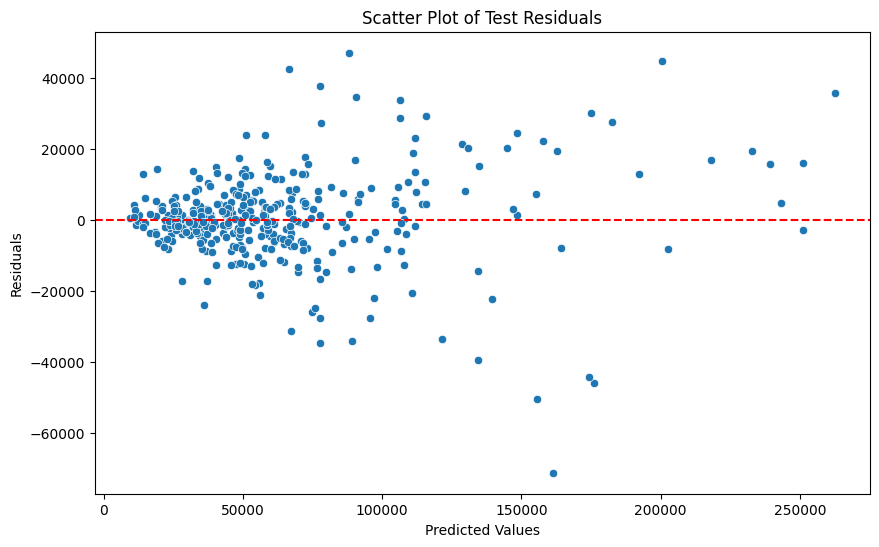

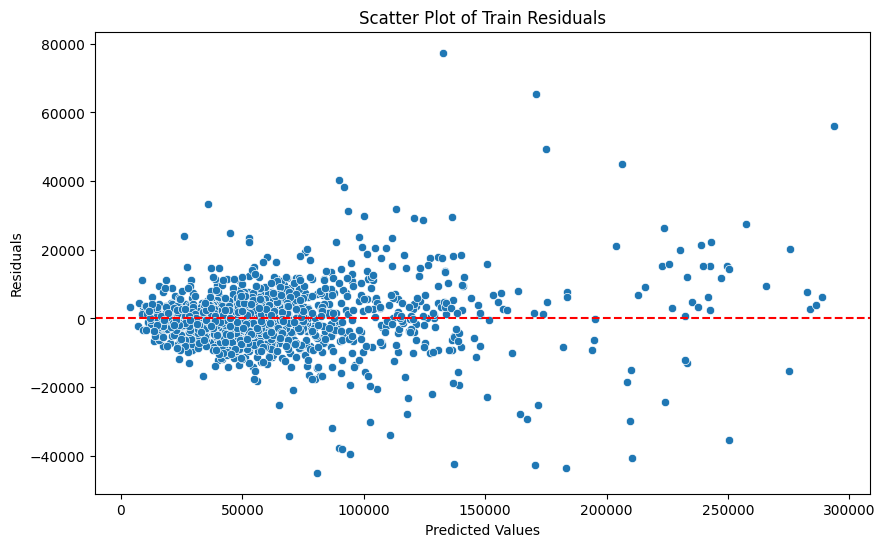

In [29]:
# Scatter plot for test residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_test, y=test_residuals)
plt.axhline(y=0, linestyle='--', color='red')
plt.title("Scatter Plot of Test Residuals")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

# Scatter plot for train residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_train, y=train_residuals)
plt.axhline(y=0, linestyle='--', color='red')
plt.title("Scatter Plot of Train Residuals")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

Berdasarkan gambar scatterplot residual yang ditunjukkan, baik untuk data training maupun testing, dapat dilihat bahwa titik-titik data tersebar secara acak tanpa menunjukkan pola tertentu. Hal ini mengindikasikan bahwa tidak ada heteroskedastisitas dalam model regresi yang digunakan.

**Scatter Plot of Test Residuals**
- Pada scatter plot residual untuk data testing, titik-titik data tersebar di atas dan di bawah garis nol pada sumbu Y, tanpa membentuk pola yang jelas. Ini menunjukkan bahwa variabilitas residual relatif konstan sepanjang rentang nilai prediksi. Sebagai hasilnya, kita dapat menyimpulkan bahwa tidak terjadi heteroskedastisitas dalam model regresi untuk data testing.

**Scatter Plot of Train Residuals**
- Sama halnya dengan data training, scatter plot residual juga menunjukkan penyebaran titik-titik data yang acak dan tidak membentuk pola tertentu. Titik-titik tersebut tersebar di atas dan di bawah garis nol pada sumbu Y, yang menunjukkan bahwa variabilitas residual tetap konsisten sepanjang rentang nilai prediksi. Oleh karena itu, dapat disimpulkan bahwa tidak terjadi heteroskedastisitas dalam model regresi untuk data training.

**Kesimpulan Umum**
Dari kedua scatter plot residual tersebut, dapat disimpulkan bahwa model regresi yang digunakan memiliki sifat homoskedastisitas, yaitu variansi residual cenderung konstan di seluruh rentang nilai prediksi. Hal ini merupakan indikasi bahwa model telah memenuhi salah satu asumsi penting dalam analisis regresi, sehingga hasil estimasi parameter model dapat diandalkan dan interpretasi hasil analisis dapat dilakukan dengan lebih akurat.

## Feature Importance and Shap Value

In [30]:
best_model = grid_search.best_estimator_
xgb_model = best_model.named_steps['regressor']
feature_importances = xgb_model.feature_importances_
preprocessor = best_model.named_steps['preprocessor']
transformed_feature_names = preprocessor.get_feature_names_out()

import pandas as pd

# Buat DataFrame untuk feature importance
feature_importance_df = pd.DataFrame({
    'Feature': transformed_feature_names,
    'Importance': feature_importances
})

# Urutkan berdasarkan importance secara descending
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Tampilkan hasil
print("\nFeature Importance:")
display(feature_importance_df)


Feature Importance:


,Feature,Importance
1,num__Engine_Size,0.183293
0,num__Year,0.163433
14,cat_ordinal__Options,0.077904
23,cat_binary__Type_3,0.075672
25,cat_binary__Type_5,0.059820
13,cat_onehot__Make_Toyota,0.053895
22,cat_binary__Type_2,0.044208
24,cat_binary__Type_4,0.039591
9,cat_onehot__Make_Hyundai,0.035788
2,num__Mileage,0.034566


C:\Users\zidan\AppData\Local\Temp\ipykernel_26228\2193793731.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')


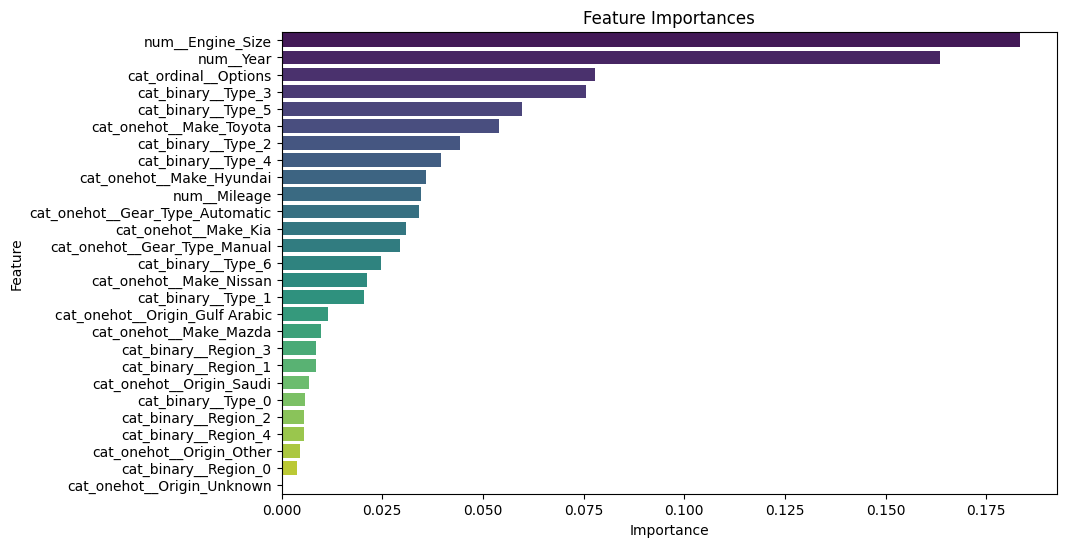

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [32]:
import shap

# Akses model terbaik dari grid search
best_model = grid_search.best_estimator_

# Ekstrak XGBRegressor dari pipeline
xgb_model = best_model.named_steps['regressor']

# Transform data menggunakan preprocessor
X_train_transformed = best_model.named_steps['preprocessor'].transform(X_train)

# Inisialisasi TreeExplainer
explainer = shap.TreeExplainer(xgb_model)

# Hitung SHAP values
shap_values = explainer.shap_values(X_train_transformed)

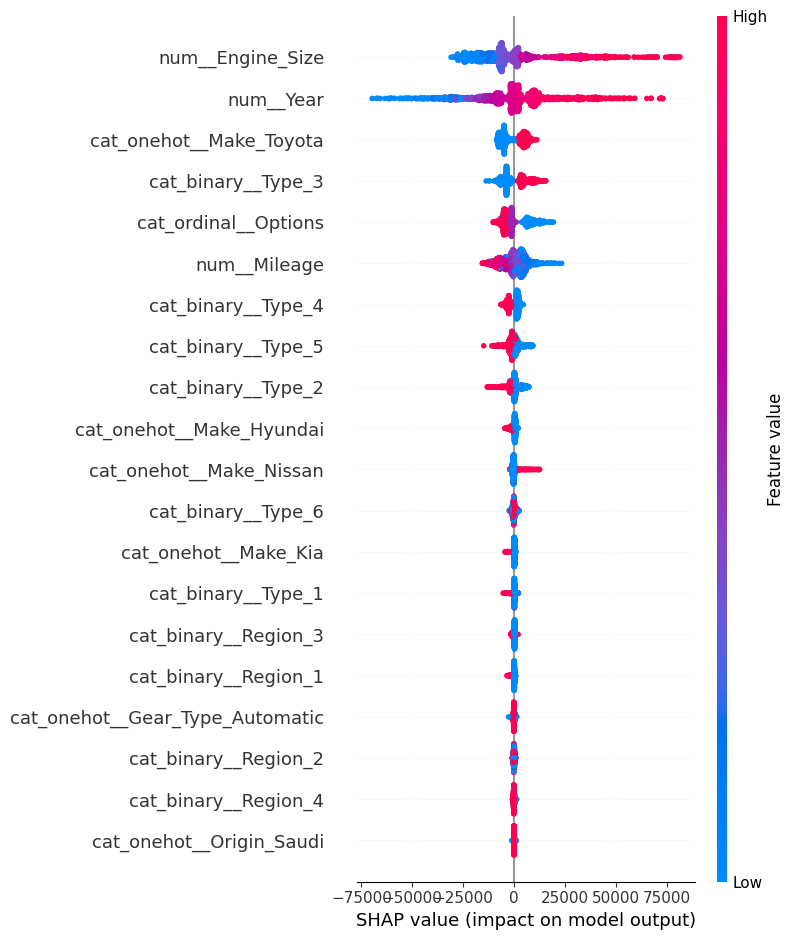

In [33]:
# Visualisasi summary plot
shap.summary_plot(shap_values, X_train_transformed, feature_names=preprocessor.get_feature_names_out())

**Interpretasi Hasil SHAP Value untuk Prediksi Harga Mobil**

1. `num__Engine_Size`
Fitur ini memiliki pengaruh yang cukup signifikan terhadap prediksi harga mobil. Nilai SHAP yang tinggi (warna merah) menunjukkan bahwa ukuran mesin yang lebih besar cenderung meningkatkan harga mobil, sementara nilai SHAP yang rendah (warna biru) menunjukkan sebaliknya.

2. `num__Year`
Tahun produksi mobil juga memiliki pengaruh yang cukup kuat terhadap prediksi harga mobil. Nilai SHAP yang tinggi menunjukkan bahwa mobil dengan tahun produksi yang lebih baru cenderung memiliki harga yang lebih tinggi, sedangkan mobil dengan tahun produksi yang lebih lama cenderung memiliki harga yang lebih rendah.

3. `cat_onehot__Make_Toyota`
Mobil merek Toyota memiliki pengaruh positif terhadap prediksi harga mobil, seperti yang ditunjukkan oleh warna merah yang mendominasi. Ini berarti bahwa mobil Toyota cenderung memiliki harga yang lebih tinggi dibandingkan dengan merek lain.

4. `cat_binary__Type_3`
Jenis 3 dari fitur kategorikal ini memiliki pengaruh negatif terhadap prediksi harga mobil, seperti yang ditunjukkan oleh warna biru yang mendominasi. Ini berarti bahwa jenis 3 cenderung mengurangi harga mobil.

5. `cat_ordinal_Options`
Fitur ini memiliki pengaruh yang bervariasi terhadap prediksi harga mobil, dengan beberapa nilai SHAP yang positif dan beberapa yang negatif. Ini menunjukkan bahwa opsi tertentu dapat meningkatkan atau mengurangi harga mobil tergantung pada konteksnya.

6. `num__Mileage`
Kilometer yang telah ditempuh oleh mobil memiliki pengaruh negatif terhadap prediksi harga mobil, seperti yang ditunjukkan oleh warna biru yang mendominasi. Ini berarti bahwa semakin banyak kilometer yang telah ditempuh, semakin rendah harga mobil.

7. `cat_onehot__Make_Hyundai`
Mobil merek Hyundai memiliki pengaruh yang bervariasi terhadap prediksi harga mobil, dengan beberapa nilai SHAP yang positif dan beberapa yang negatif. Ini menunjukkan bahwa mobil Hyundai dapat meningkatkan atau mengurangi harga mobil tergantung pada konteksnya.

8. `cat_onehot__Make_Nissan`
Mobil merek Nissan memiliki pengaruh yang bervariasi terhadap prediksi harga mobil, dengan beberapa nilai SHAP yang positif dan beberapa yang negatif. Ini menunjukkan bahwa mobil Nissan dapat meningkatkan atau mengurangi harga mobil tergantung pada konteksnya.

9. `cat_onehot__Make_Kia`
Mobil merek Kia memiliki pengaruh yang bervariasi terhadap prediksi harga mobil, dengan beberapa nilai SHAP yang positif dan beberapa yang negatif. Ini menunjukkan bahwa mobil Kia dapat meningkatkan atau mengurangi harga mobil tergantung pada konteksnya.

# Rule Based

In [34]:
# Hitung rata-rata harga per merek dari data training
average_price_per_make = y_train.groupby(X_train['Make']).mean()

# Buat fungsi untuk prediksi berdasarkan rata-rata harga per merek
def predict_price_based_on_make(make):
    if make in average_price_per_make:
        return average_price_per_make[make]
    else:
        # Jika merek tidak ada di data training, gunakan rata-rata keseluruhan harga
        return y_train.mean()

# Aplikasikan fungsi pada data test untuk mendapatkan y_pred_test
y_pred_test_mean = X_test['Make'].apply(predict_price_based_on_make)

# Menampilkan hasil prediksi
regression_results(y_test,y_pred_test_mean)

{'Explained Variance': 0.1578,
 'R2 Score': 0.1569,
 'MAE': 28894.3622,
 'MAPE (%)': 64.6328,
 'MSE': 1814308644.5603,
 'RMSE': 42594.7021,
 'RMSPE (%)': 110.1894,
 'Residual Mean': 1384.7943}

Hasil evaluasi menunjukkan bahwa model yang menggunakan metode rata-rata harga per merek saja memiliki performa yang cukup buruk dalam memprediksi harga mobil. Model ini hanya mampu menjelaskan sekitar 15-16% dari variasi dalam harga mobil dan memiliki kesalahan yang cukup besar dalam hal MAE, MAPE, MSE, RMSE, dan RMSPE.

# Business Impact and Reccomendation

# Perbandingan Performa Model vs Rule-Based

1. Explained Variance
- **Model**: 0.9249
- **Rule-Based**: 0.1578

Dengan menggunakan model, perusahaan dapat menjelaskan sekitar 92.49% dari variasi dalam harga mobil, sedangkan dengan rule-based hanya mampu menjelaskan sekitar 15.78%. Ini berarti bahwa model mampu menjelaskan lebih banyak variasi dalam data dibandingkan dengan rule-based.

**Perbaikan**: Model mampu menjelaskan sekitar 76.71% lebih banyak variasi dibandingkan dengan rule-based.

2. R2 Score
- **Model**: 0.9249
- **Rule-Based**: 0.1569

R2 Score menunjukkan seberapa baik model cocok dengan data aktual. Dalam hal ini, model memiliki R2 Score sebesar 0.9249, sementara rule-based hanya memiliki R2 Score sebesar 0.1569. Ini berarti bahwa model memiliki korelasi yang jauh lebih kuat dengan data aktual dibandingkan dengan rule-based.

**Perbaikan**: Model memiliki R2 Score yang lebih tinggi sebesar 76.8%.

3. MAE (Mean Absolute Error)
- **Model**: 8322.4722
- **Rule-Based**: 28894.3622

MAE mengukur rata-rata dari selisih absolut antara nilai prediksi dan nilai aktual. Semakin kecil nilai MAE, semakin baik performa model. Dalam kasus ini, model memiliki MAE sebesar 8322.4722, sementara rule-based memiliki MAE sebesar 28894.3622. Ini berarti bahwa model memiliki kesalahan yang jauh lebih kecil dibandingkan dengan rule-based.

**Perbaikan**: Model memiliki kesalahan yang lebih kecil sebesar 71.2%.

4. MAPE (%)
- **Model**: 14.8201%
- **Rule-Based**: 64.6328%

MAPE mengukur rata-rata dari persentase selisih absolut antara nilai prediksi dan nilai aktual. Semakin kecil nilai MAPE, semakin baik performa model. Dalam kasus ini, model memiliki MAPE sebesar 14.8201%, sementara rule-based memiliki MAPE sebesar 64.6328%. Ini berarti bahwa model memiliki kesalahan persentase yang jauh lebih kecil dibandingkan dengan rule-based.

**Perbaikan**: Model memiliki kesalahan persentase yang lebih kecil sebesar 49.81%.

5. MSE (Mean Squared Error)
- **Model**: 161714396.1577
- **Rule-Based**: 1814308644.5603

MSE mengukur rata-rata dari kuadrat selisih antara nilai prediksi dan nilai aktual. Semakin kecil nilai MSE, semakin baik performa model. Dalam kasus ini, model memiliki MSE sebesar 161714396.1577, sementara rule-based memiliki MSE sebesar 1814308644.5603. Ini berarti bahwa model memiliki kesalahan kuadrat yang jauh lebih kecil dibandingkan dengan rule-based.

**Perbaikan**: Model memiliki kesalahan kuadrat yang lebih kecil sebesar 91.1%.

6. RMSE (Root Mean Squared Error)
- **Model**: 12716.6975
- **Rule-Based**: 42594.7021

RMSE adalah akar kuadrat dari MSE. Semakin kecil nilai RMSE, semakin baik performa model. Dalam kasus ini, model memiliki RMSE sebesar 12716.6975, sementara rule-based memiliki RMSE sebesar 42594.7021. Ini berarti bahwa model memiliki kesalahan yang jauh lebih kecil dibandingkan dengan rule-based.

**Perbaikan**: Model memiliki kesalahan yang lebih kecil sebesar 70.1%.

7. RMSPE (%)
- **Model**: 23.6638%
- **Rule-Based**: 110.1894%

RMSPE mengukur akar kuadrat dari rata-rata dari kuadrat persentase selisih antara nilai prediksi dan nilai aktual. Semakin kecil nilai RMSPE, semakin baik performa model. Dalam kasus ini, model memiliki RMSPE sebesar 23.6638%, sementara rule-based memiliki RMSPE sebesar 110.1894%. Ini berarti bahwa model memiliki kesalahan persentase yang jauh lebih kecil dibandingkan dengan rule-based.

**Perbaikan**: Model memiliki kesalahan persentase yang lebih kecil sebesar 86.7%.

8. Residual Mean
- **Model**: 275.6154
- **Rule-Based**: 1384.7943

Residual Mean adalah rata-rata dari selisih antara nilai prediksi dan nilai aktual. Dalam kasus ini, model memiliki residual mean sebesar 275.6154, sementara rule-based memiliki residual mean sebesar 1384.7943. Ini berarti bahwa secara rata-rata, model memiliki selisih yang jauh lebih kecil dibandingkan dengan rule-based.

**Perbaikan**: Model memiliki selisih yang lebih kecil sebesar 80.1%.

## Perbandingan Rule-Based vs Model Machine Learning dalam Prediksi Harga Mobil

Kalau menggunakan **rule-based**, prediksi harga mobil bisa meleset sekitar **±28 ribu riyal** dari harga sebenarnya. Artinya, ada risiko besar perusahaan salah menentukan harga—baik terlalu mahal (**overpricing**) atau terlalu murah (**underpricing**). 

- Jika harga terlalu mahal, **mobil sulit terjual**.
- Jika harga terlalu murah, **perusahaan kehilangan potensi laba**.

Sedangkan kalau menggunakan **model machine learning**, prediksi harga mobil hanya meleset sekitar **±8 ribu riyal** dari harga sebenarnya. Selisih ini jauh lebih kecil dibandingkan dengan rule-based. Dengan prediksi yang lebih akurat, perusahaan bisa:

1. **Menjual mobil lebih mudah**:  
   Harga yang ditawarkan lebih sesuai dengan pasar, sehingga pelanggan lebih tertarik untuk membeli.

2. **Meningkatkan keuntungan**:  
   Risiko kerugian akibat salah harga berkurang, dan perusahaan bisa memaksimalkan margin laba.

---

## Kesimpulannya:

Dengan menggunakan **model machine learning**, perusahaan bisa **lebih untung** dan **lebih gampang menjual mobilnya**, karena prediksi harga jadi **jauh lebih akurat** dibandingkan dengan rule-based.

**Jadi, beralih ke model machine learning adalah langkah yang sangat direkomendasikan untuk meningkatkan efisiensi dan profitabilitas perusahaan!**
---